## merge data stage

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
five_sgns=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/5SGns_umicount_intronexon.h5ad")
five_sgns

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 1920 × 43419
    obs: 'sample_ID_Plate'

In [3]:
five_sgns.var

Empty DataFrame
Columns: []
Index: [Gnai3, Pbsn, Cdc45, H19, Scml2, Apoh, Narf, Cav2, Klf6, Scmh1, Cox5a, Tbx2, Tbx4, Zfy2, Ngfr, Wnt3, Wnt9a, Fer, Xpo6, Tfe3, Axin2, Brat1, Gna12, Slc22a18, Itgb2l, Igsf5, Pih1d2, Dlat, Sdhd, Fgf23, Fgf6, Ccnd2, Gpr107, Nalcn, Btbd17, Slfn4, Th, Ins2, Scnn1g, Drp2, Tspan32, Lhx2, Clec2g, Gmpr, Glra1, Mid2, Trim25, Dgke, Scpep1, Mnt, Itgb2, Hddc2, Tpd52l1, Pemt, Cdh1, Cdh4, Ckmt1, Bcl6b, Clec10a, Alox12, Comt, Rtca, Dbt, Dazap2, Mcts1, Rem1, Rnf17, Trappc10, Ccm2, Wap, Tbrg4, Tmprss2, Mx1, Fap, Gcg, Ndufa9, Egfl6, Lck, Tssk3, Cttnbp2, Galnt1, Myf5, Mkrn2, Pparg, Raf1, Septin1, Pdgfb, Acvrl1, Tamalin, Acvr1b, Tom1l2, Gpa33, Zfp385a, Itga5, Gabra2, Wdr77, Adora3, Atp5pb, Sox9, Hnrnpd, ...]

[43419 rows x 0 columns]

In [4]:
introexon=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/Smartseq3xpress_umicount_intronexon.h5ad")
introexon

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4224 × 53040
    obs: 'sample_ID_Plate'

In [5]:
introexon.var

Empty DataFrame
Columns: []
Index: [Gnai3, Pbsn, Cdc45, H19, Scml2, Apoh, Narf, Cav2, Klf6, Scmh1, Cox5a, Tbx2, Tbx4, Zfy2, Ngfr, Wnt3, Wnt9a, Fer, Xpo6, Tfe3, Axin2, Brat1, Gna12, Slc22a18, Itgb2l, Igsf5, Pih1d2, Dlat, Sdhd, Fgf23, Fgf6, Ccnd2, Gpr107, Nalcn, Btbd17, Slfn4, Th, Ins2, Scnn1g, Drp2, Tspan32, Lhx2, Clec2g, Gmpr, Glra1, Mid2, Trim25, Dgke, Scpep1, Mnt, Itgb2, Hddc2, Tpd52l1, Pemt, Cdh1, Cdh4, Ckmt1, Bcl6b, Clec10a, Alox12, Comt, Rtca, Dbt, Dazap2, Mcts1, Rem1, Rnf17, Trappc10, Ccm2, Wap, Tbrg4, Tmprss2, Mx1, Fap, Gcg, Ndufa9, Egfl6, Lck, Tssk3, Cttnbp2, Galnt1, Myf5, Mkrn2, Pparg, Raf1, Septin1, Pdgfb, Acvrl1, Tamalin, Acvr1b, Tom1l2, Gpa33, Zfp385a, Itga5, Gabra2, Wdr77, Adora3, Atp5pb, Sox9, Hnrnpd, ...]

[53040 rows x 0 columns]

In [103]:
five_sgns.obs['batch'] = 'batch 1'
introexon.obs['batch'] = 'batch 2'

In [104]:


# Now make sure variable names are unique
five_sgns.var_names_make_unique()
introexon.var_names_make_unique()

# And then concatenate
#combined = sc.concat([five_sgns, introexon], join='outer')


In [66]:
combined

AnnData object with n_obs × n_vars = 6144 × 53157
    obs: 'sample_ID_Plate', 'batch'

In [67]:
combined.obs['batch'].value_counts()

batch
batch 2    4224
batch 1    1920
Name: count, dtype: int64

In [68]:
combined.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/Sgns_merged.h5ad")

In [69]:
introexon=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/Sgns_merged.h5ad")
introexon

AnnData object with n_obs × n_vars = 6144 × 53157
    obs: 'sample_ID_Plate', 'batch'

In [105]:
introexon.layers["umi"] = introexon.X.copy() # save the UMI counts in a new layer

In [106]:
introexon.var_names_make_unique()
introexon

AnnData object with n_obs × n_vars = 4224 × 53040
    obs: 'sample_ID_Plate', 'batch'
    layers: 'umi'

In [107]:
introexon.var_names

Index(['Gnai3', 'Pbsn', 'Cdc45', 'H19', 'Scml2', 'Apoh', 'Narf', 'Cav2',
       'Klf6', 'Scmh1',
       ...
       'rRNA_rnacentral_332', 'rRNA_rnacentral_340', 'rRNA_rnacentral_341',
       'rRNA_rnacentral_342', 'rRNA_rnacentral_348', 'rRNA_rnacentral_361',
       'rRNA_rnacentral_367', 'rRNA_rnacentral_86', 'rRNA_rnacentral_88',
       'rRNA_rnacentral_95'],
      dtype='object', length=53040)

In [109]:
introexon.var_names

Index(['Gnai3', 'Pbsn', 'Cdc45', 'H19', 'Scml2', 'Apoh', 'Narf', 'Cav2',
       'Klf6', 'Scmh1',
       ...
       'rRNA_rnacentral_332', 'rRNA_rnacentral_340', 'rRNA_rnacentral_341',
       'rRNA_rnacentral_342', 'rRNA_rnacentral_348', 'rRNA_rnacentral_361',
       'rRNA_rnacentral_367', 'rRNA_rnacentral_86', 'rRNA_rnacentral_88',
       'rRNA_rnacentral_95'],
      dtype='object', length=53040)

In [97]:
five_sgns.var_names

Index(['Gnai3', 'Pbsn', 'Cdc45', 'H19', 'Scml2', 'Apoh', 'Narf', 'Cav2',
       'Klf6', 'Scmh1',
       ...
       'rRNA_rnacentral_252', 'rRNA_rnacentral_253', 'rRNA_rnacentral_330',
       'rRNA_rnacentral_332', 'rRNA_rnacentral_340', 'rRNA_rnacentral_341',
       'rRNA_rnacentral_342', 'rRNA_rnacentral_361', 'rRNA_rnacentral_367',
       'rRNA_rnacentral_86'],
      dtype='object', length=43419)

In [76]:
sc.pp.filter_cells(introexon, min_genes=200)
sc.pp.filter_genes(introexon, min_cells=3)

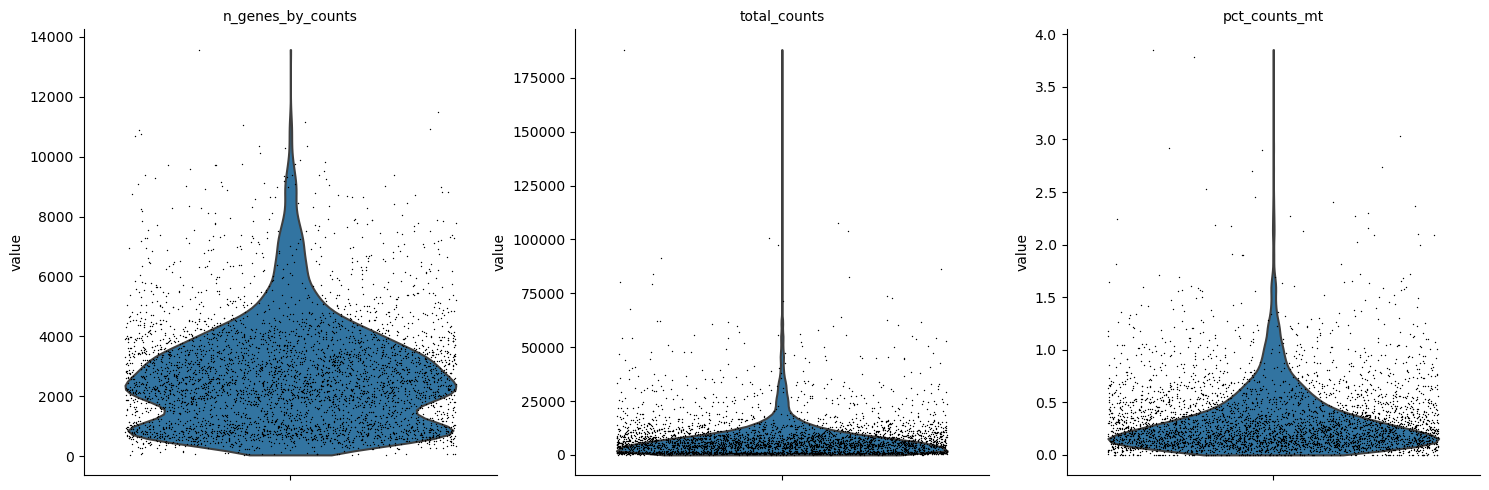

In [111]:
introexon.var['mt'] = introexon.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(introexon, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)\

sc.pl.violin(introexon, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

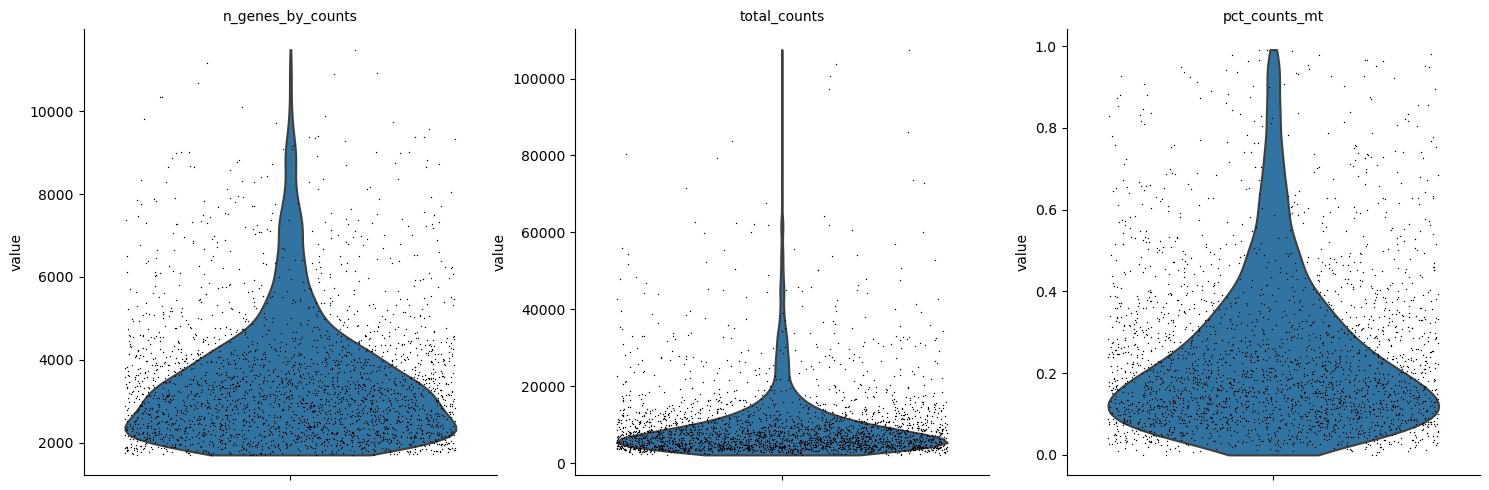

In [112]:
introexon1=introexon[introexon.obs.n_genes_by_counts > 1700, :]
introexon1=introexon1[introexon1.obs.pct_counts_mt < 1.0,]
sc.pl.violin(introexon1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [113]:
introexon2=introexon1.copy()

## five sgns

In [114]:
five_sgns.layers["umi"] = five_sgns.X.copy() # save the UMI counts in a new layer

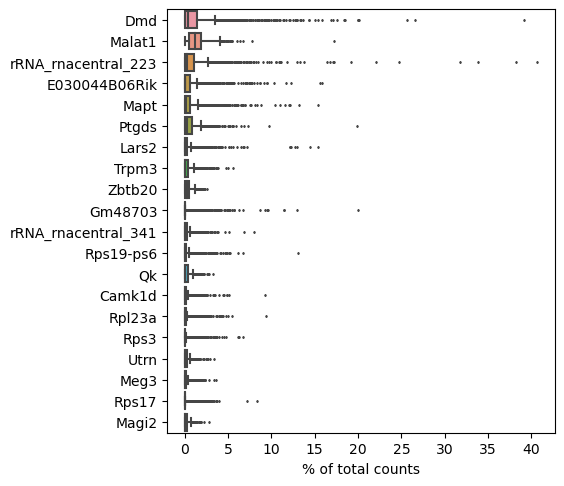

In [115]:
sc.pl.highest_expr_genes(five_sgns, n_top=20, )


In [116]:
sc.pp.filter_cells(five_sgns, min_genes=200)
sc.pp.filter_genes(five_sgns, min_cells=3)

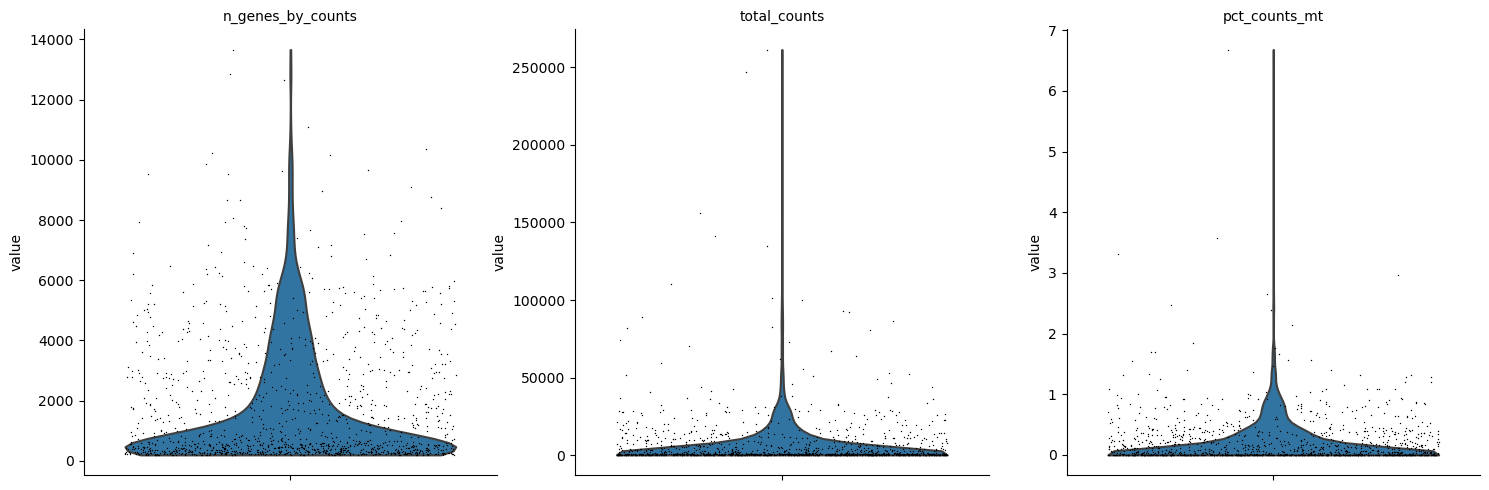

In [117]:
five_sgns.var['mt'] = five_sgns.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(five_sgns, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)\

sc.pl.violin(five_sgns, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

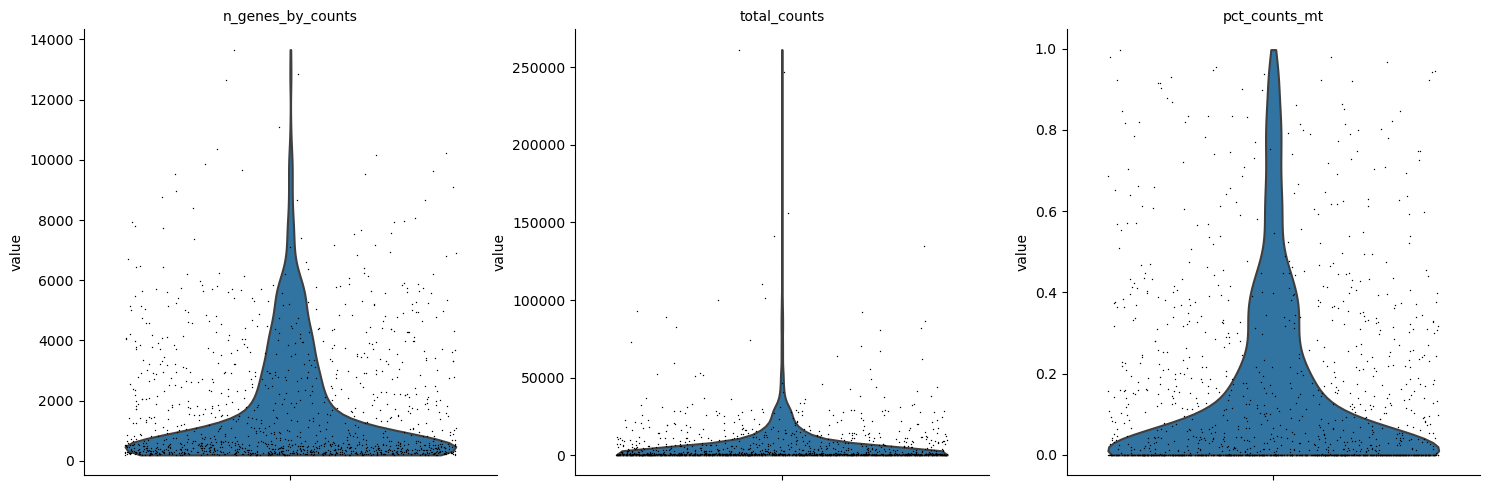

In [118]:
five_sgns=five_sgns[five_sgns.obs.pct_counts_mt < 1.0,]
sc.pl.violin(five_sgns, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

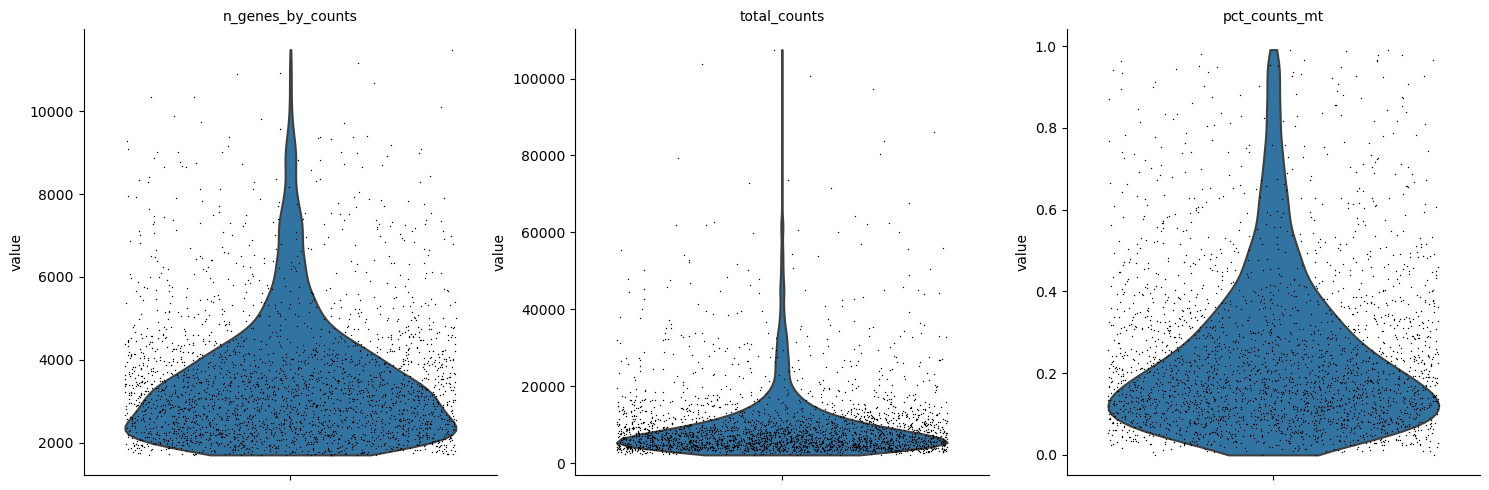

In [122]:
sc.pl.violin(introexon1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [121]:
print(five_sgns)

print(introexon1)

View of AnnData object with n_obs × n_vars = 1245 × 26484
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'umi'
View of AnnData object with n_obs × n_vars = 2751 × 53040
    obs: 'sample_ID_Plate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'umi'


In [124]:
common_genes = five_sgns.var_names[five_sgns.var_names.isin(introexon.var_names)]
five_sgns_filled = five_sgns[:, common_genes].copy()

# 合并两个对象
combined = introexon.concatenate(five_sgns_filled, join='outer')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [125]:
combined

AnnData object with n_obs × n_vars = 5469 × 53040
    obs: 'sample_ID_Plate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-1'
    layers: 'umi'

In [144]:
combined.X

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

### analysis

In [126]:
sc.pp.normalize_total(combined, target_sum=None)


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [127]:
sc.pp.log1p(combined)


In [129]:
sc.pp.combat(combined, key='batch')

In [131]:
sc.pp.highly_variable_genes(combined, n_top_genes=2000, flavor='seurat_v3',layer='umi')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


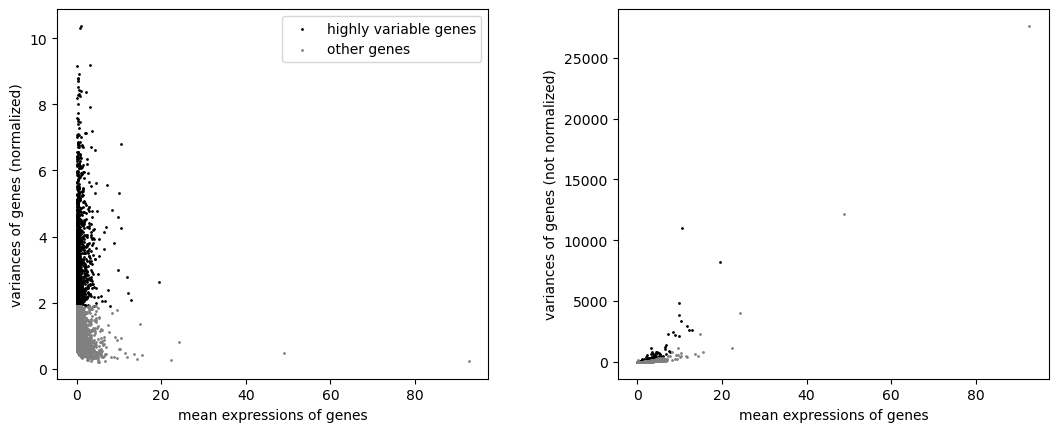

In [132]:
sc.pl.highly_variable_genes(combined)

In [133]:
combined2=combined.copy()

In [135]:
sc.pp.scale(combined2, max_value=10)


In [136]:
combined2

AnnData object with n_obs × n_vars = 5469 × 53040
    obs: 'sample_ID_Plate', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'
    layers: 'umi'

In [138]:
combined2.X = np.nan_to_num(combined2.X, nan=0)
sc.tl.pca(combined2, svd_solver='arpack')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:640: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


ValueError: Axis limits cannot be NaN or Inf

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

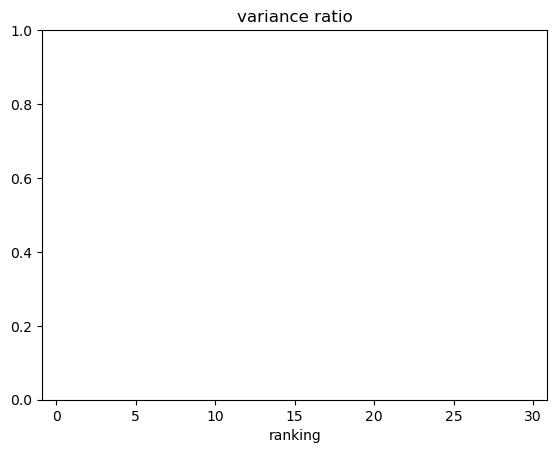

In [139]:
sc.pl.pca_variance_ratio(combined2, log=True)


In [ ]:
sc.pp.neighbors(introexon2, n_neighbors=50, n_pcs=15)


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:

In [ ]:
sc.tl.leiden(introexon2, resolution=0.3)
sc.tl.umap(introexon2,min_dist=0.2)

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


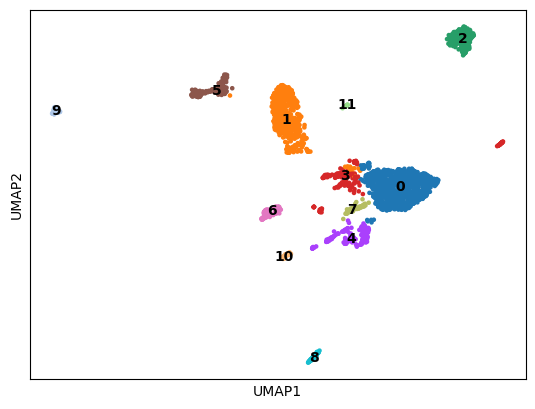

In [ ]:
# show the louvain clusters in the UMAP
sc.pl.umap(introexon2, color=['leiden'], legend_loc='on data', title='')

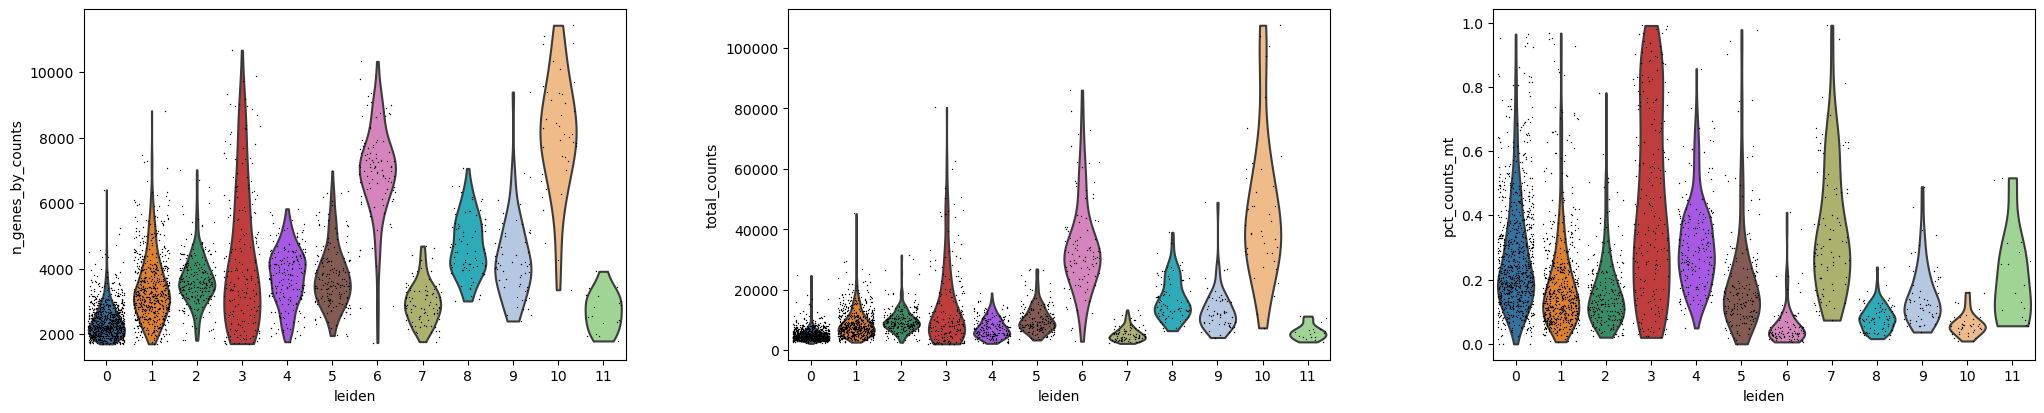

In [ ]:
sc.pl.violin(introexon2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True,groupby='leiden')

In [ ]:
introexon2

AnnData object with n_obs × n_vars = 2751 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

In [ ]:
introexon2.obs.leiden.value_counts()

leiden
0     905
1     613
2     259
3     213
4     200
5     179
6     101
7      87
8      80
9      56
10     40
11     18
Name: count, dtype: int64

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


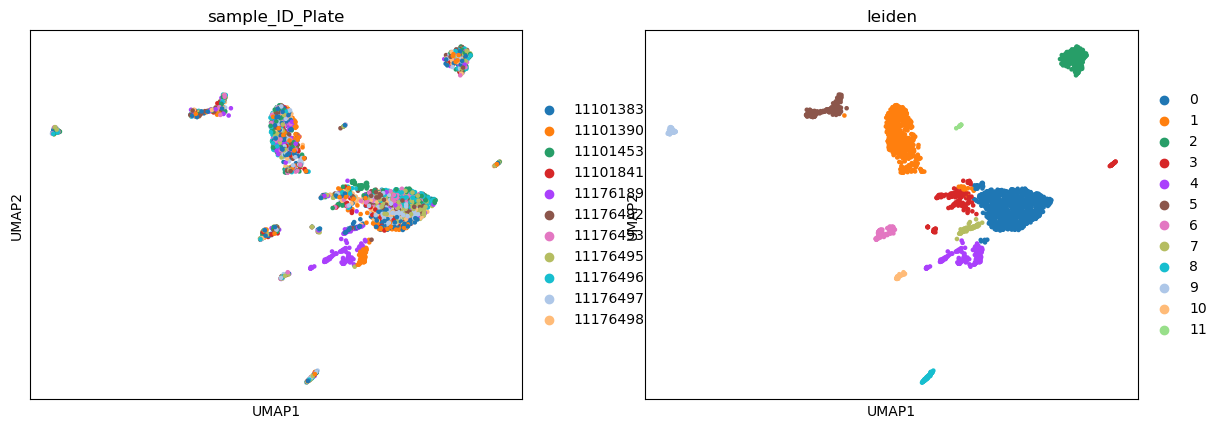

In [ ]:
sc.pl.umap(introexon2,color=['sample_ID_Plate','leiden'])

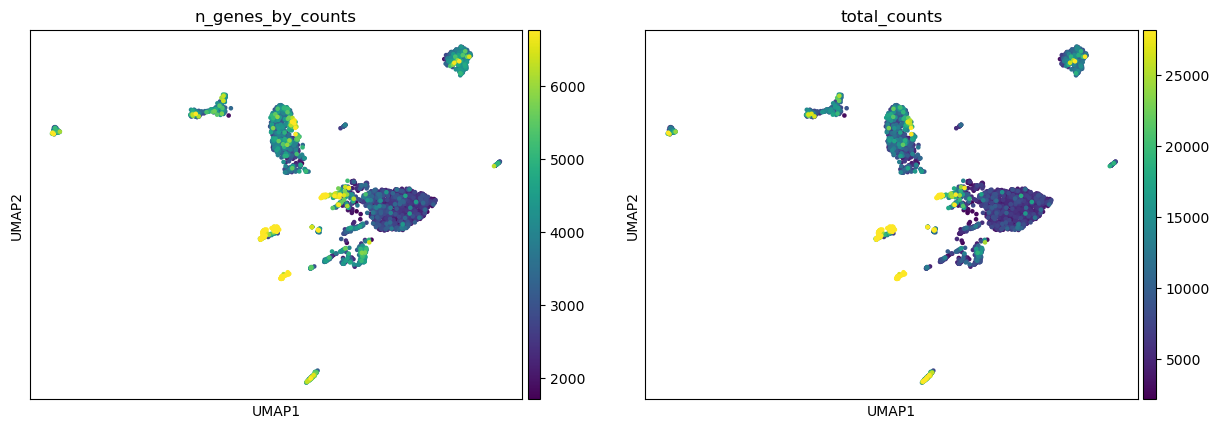

In [ ]:
#show n_genes_by_counts
sc.pl.umap(introexon2, color=['n_genes_by_counts','total_counts'], legend_loc='on data',vmax='p95')

### introexon no 2 & 0

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


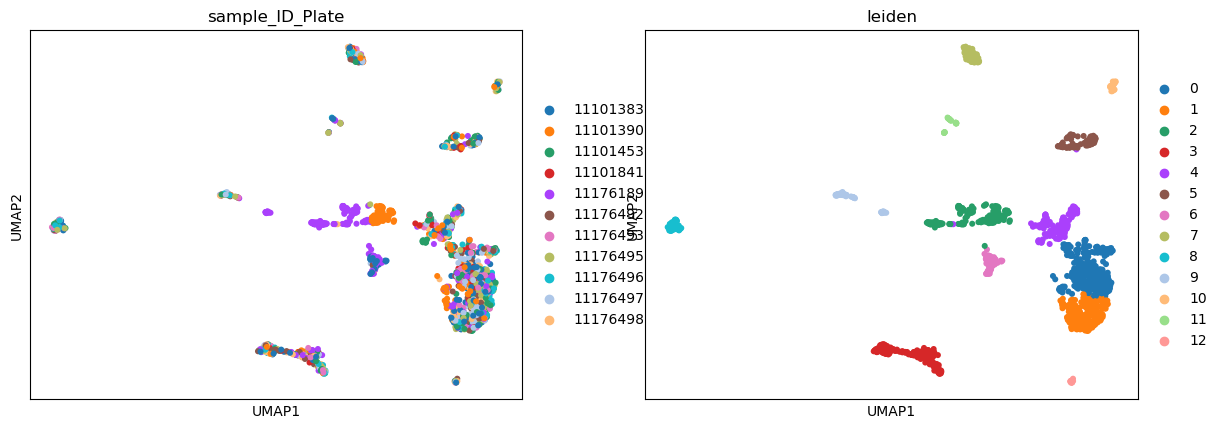

In [ ]:
sc.pl.umap(introexon_no0_no2,color=['sample_ID_Plate','leiden'])

In [ ]:
introexon_no0_no2

AnnData object with n_obs × n_vars = 1587 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'sample_ID_Plate_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

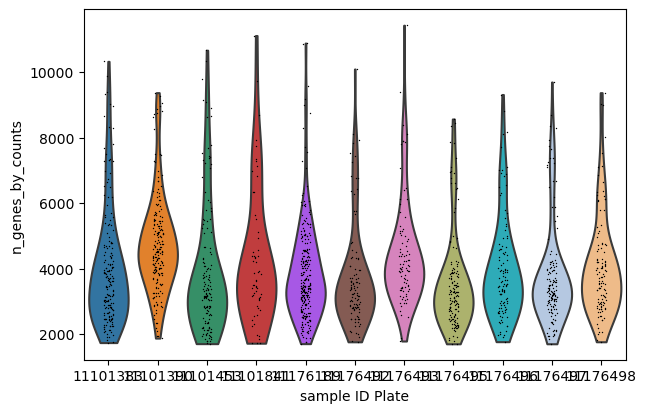

In [ ]:
sc.pl.violin(introexon_no0_no2,groupby='sample_ID_Plate',keys='n_genes_by_counts')

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


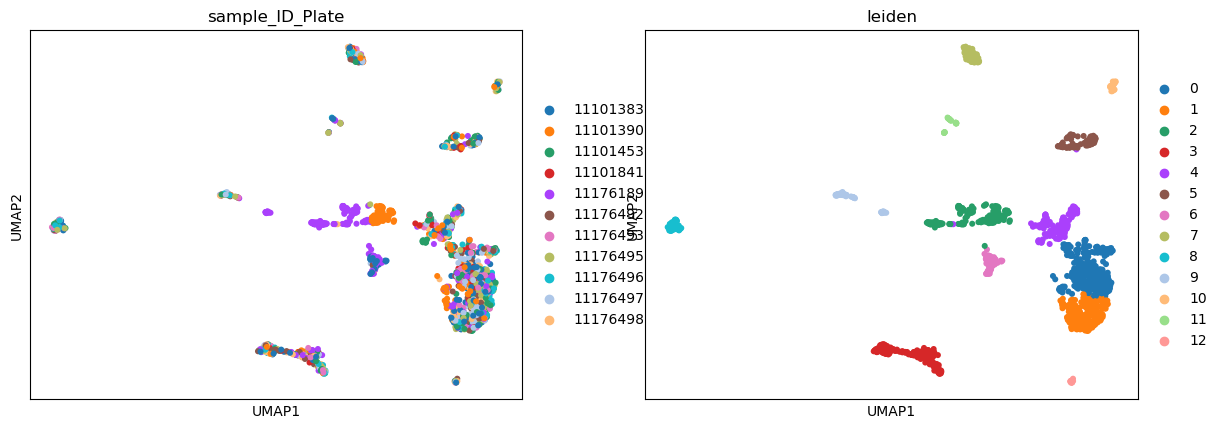

In [ ]:
sc.pl.umap(introexon_no0_no2,color=['sample_ID_Plate','leiden'])

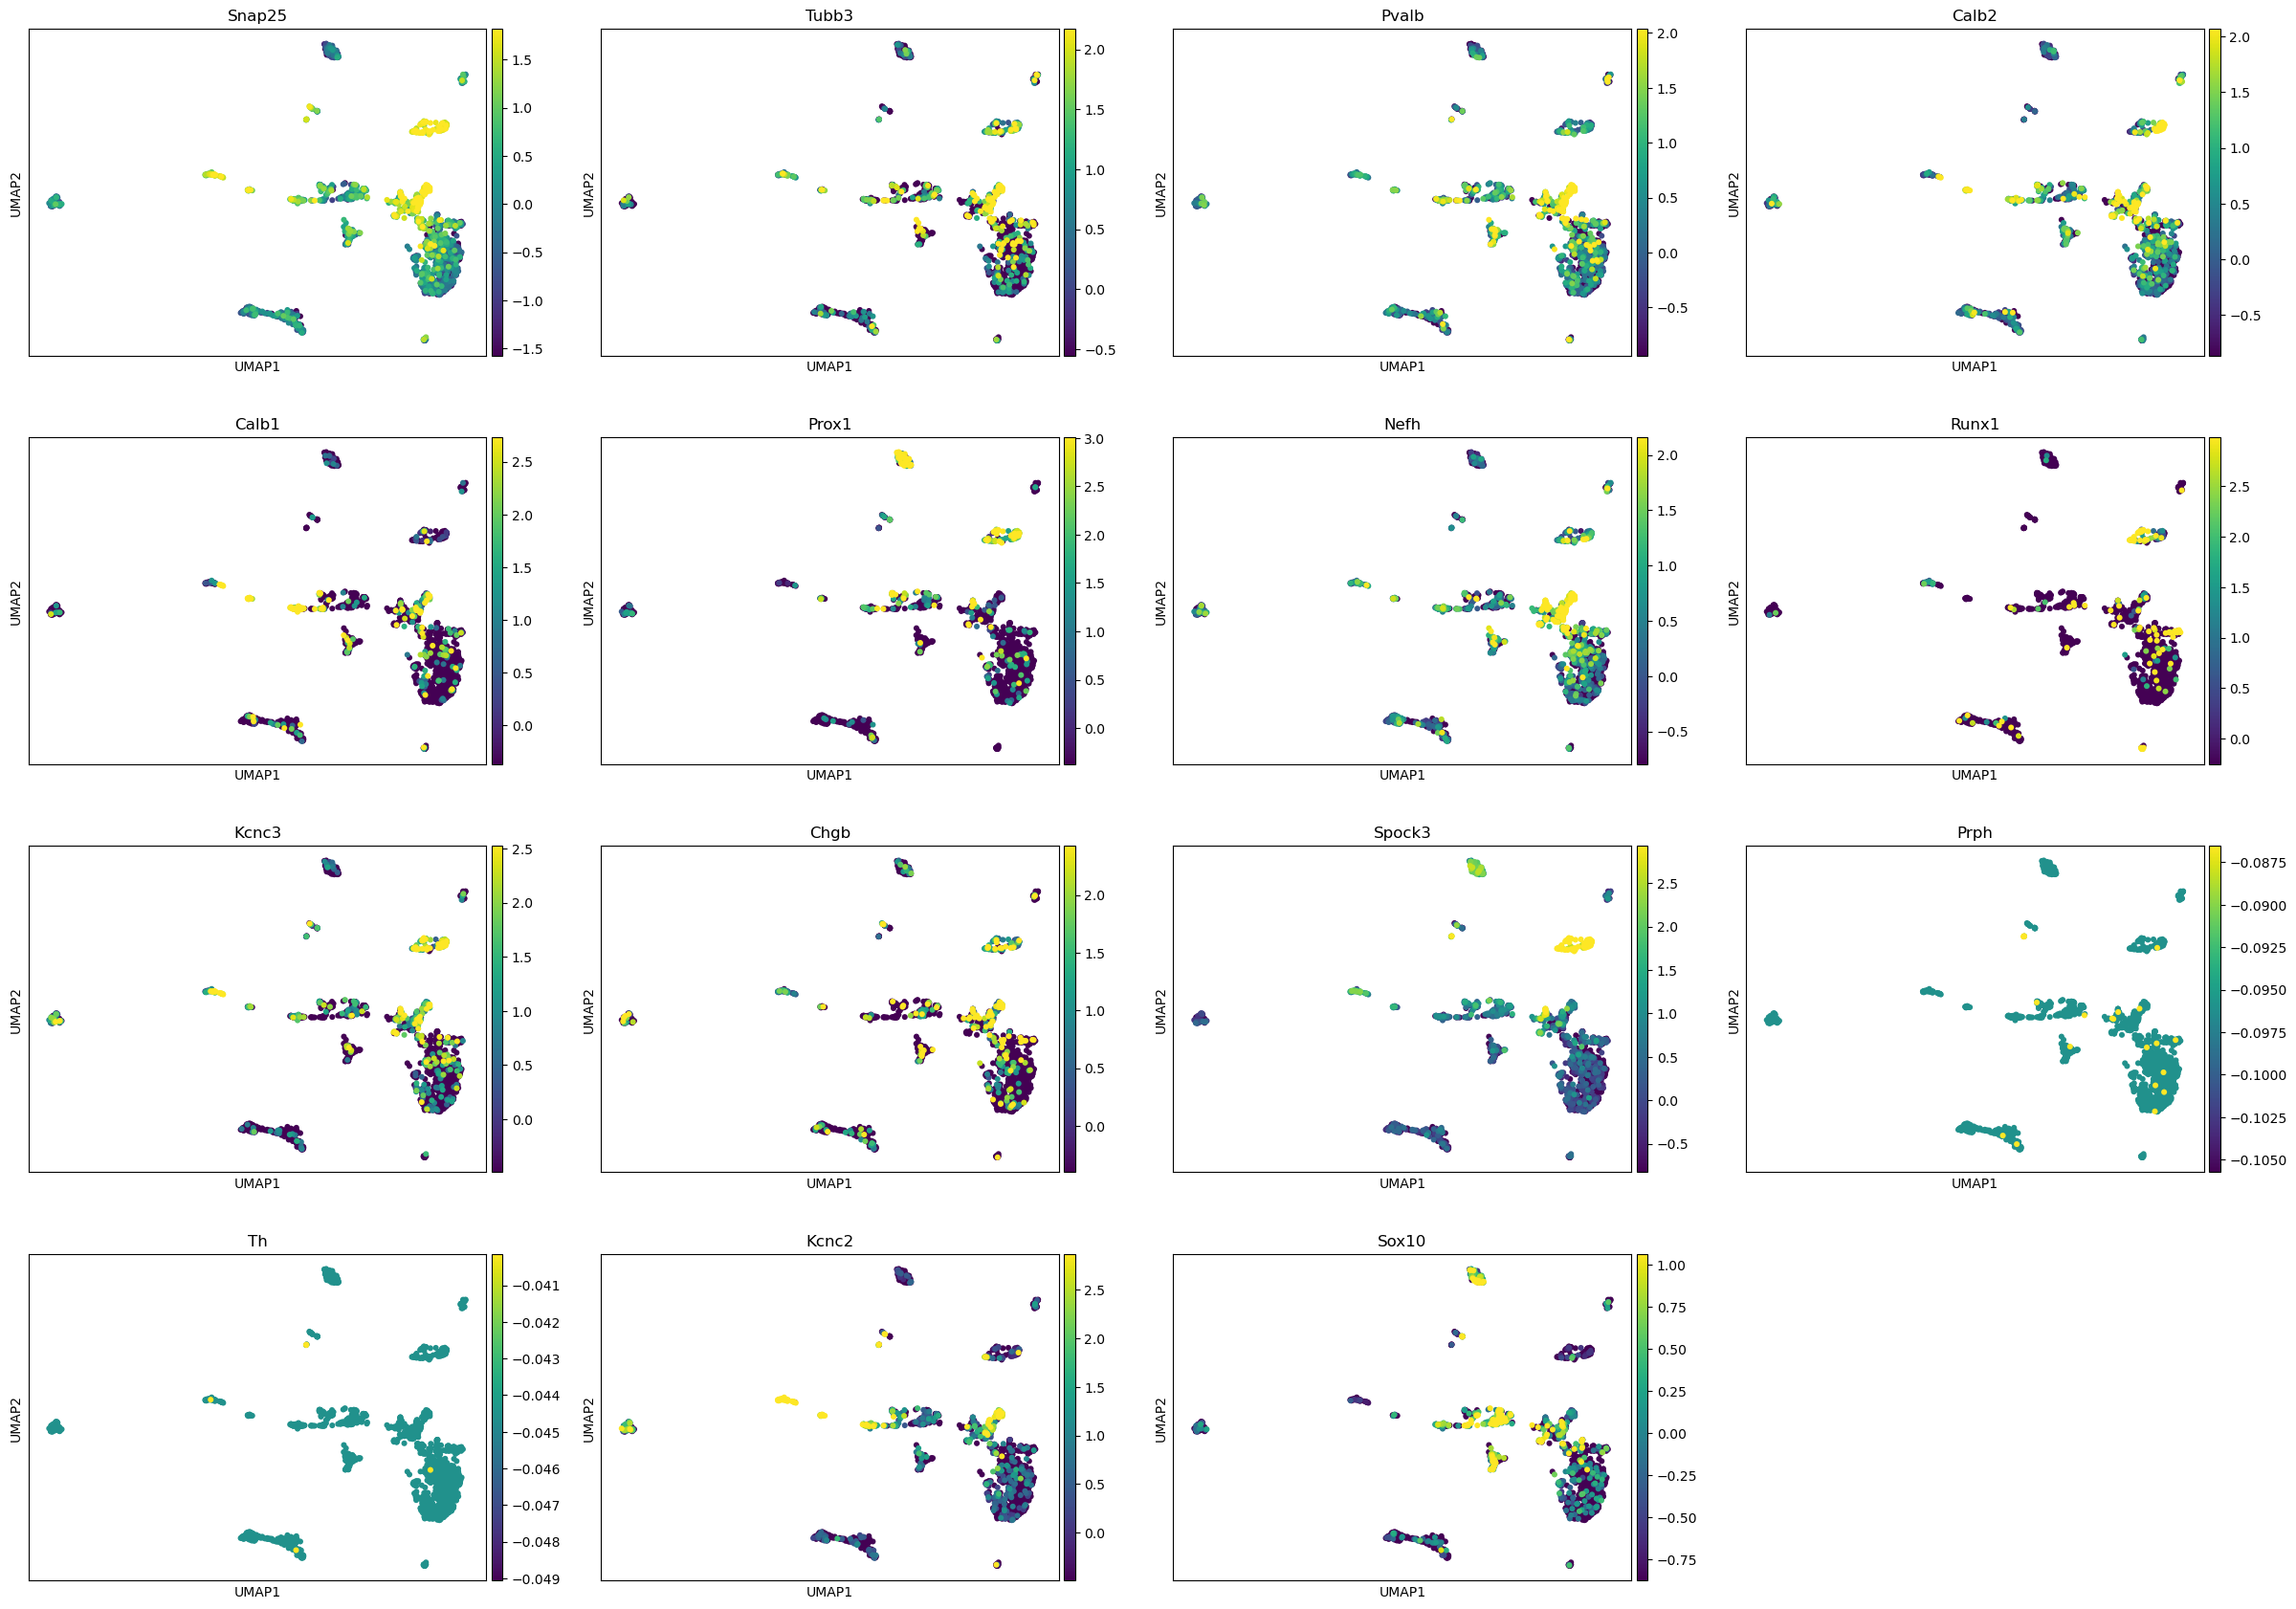

In [ ]:
sc.pl.umap(introexon_no0_no2, color=['Snap25','Tubb3','Pvalb','Calb2','Calb1','Prox1','Nefh','Runx1','Kcnc3','Chgb','Spock3','Prph','Th','Kcnc2','Sox10'], legend_loc='on data',vmax='p95')

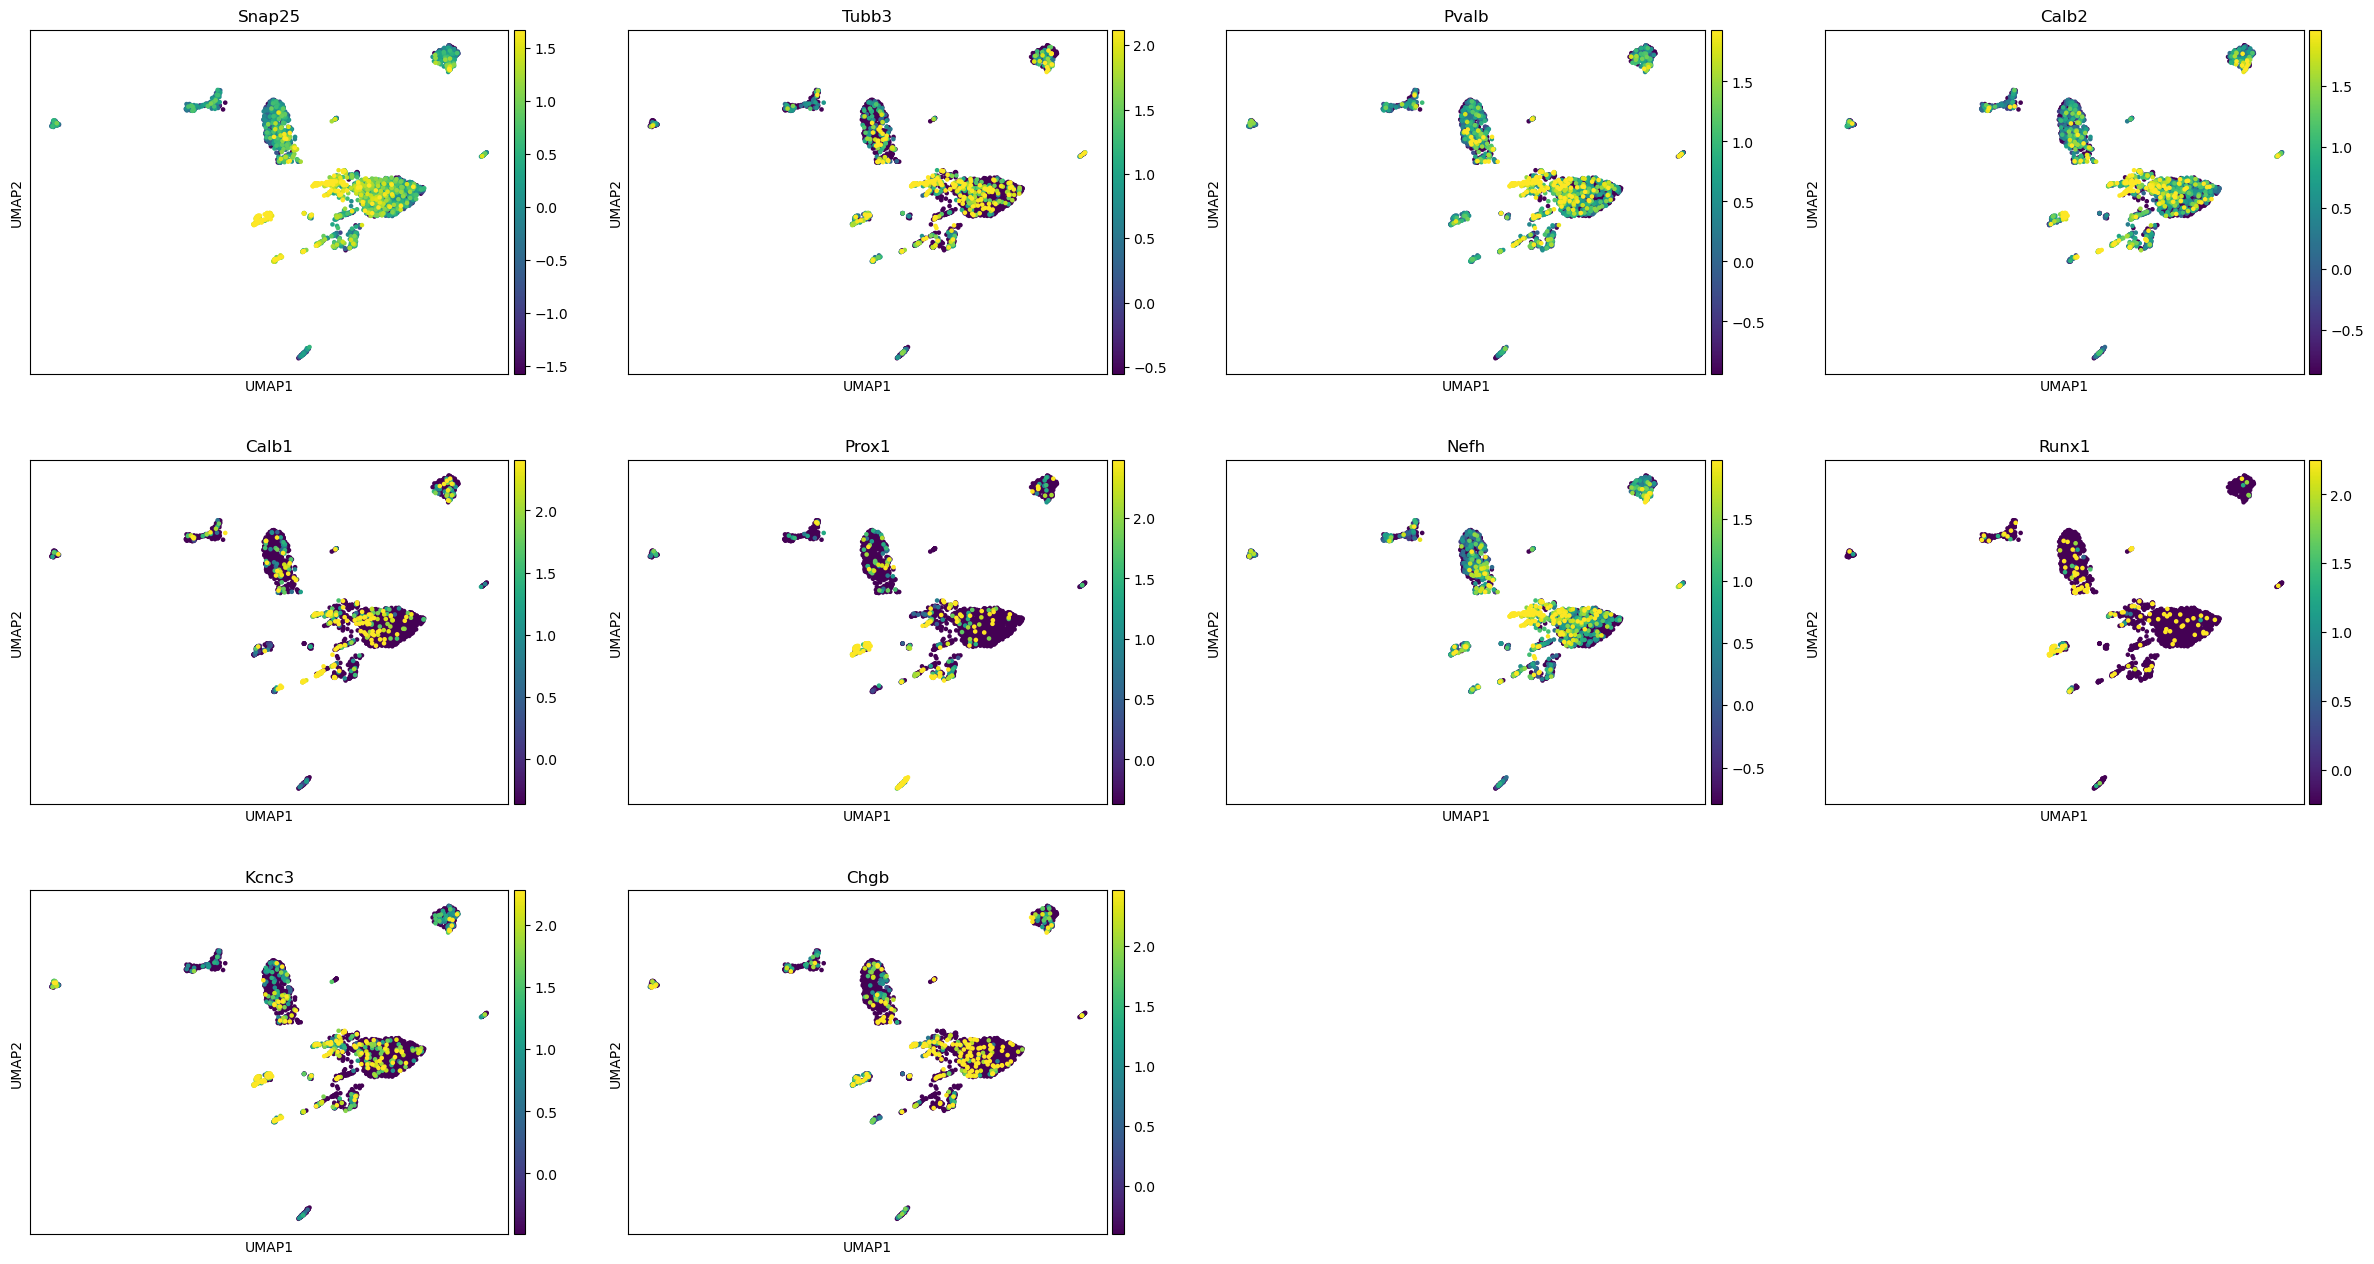

In [ ]:
sc.pl.umap(introexon2, color=['Snap25','Tubb3','Pvalb','Calb2','Calb1','Prox1','Nefh','Runx1','Kcnc3','Chgb'], legend_loc='on data',vmax='p95')

In [ ]:
marker_genes_dict0 = introexon2.uns['rank_genes_groups']['names']
marker_genes_df0 = pd.DataFrame(marker_genes_dict0)
marker_genes_df0

0        1        2         3                    4       5  \
0          Utrn  Colec12    Pde1c    Snap25              Slc24a2    Bnc2   
1          Hcn1    Cped1  Slc6a15    Spock2                Prr5l   Foxp2   
2         Mctp1  Slc6a13    Lama1     Calm1                 Plp1   Klf12   
3           Mpz   Zbtb20    Npas3      Nefh           St6galnac3   Dock5   
4      Arhgap24    Tmtc4    Slit3     Rab6b            Mir219a-2   Ildr2   
...         ...      ...      ...       ...                  ...     ...   
32758     Prkcb     Hcn1    Prkcb    Malat1                 Sspn  Slc9a9   
32759    Ctnnd2   Sorcs1    Ntrk3      Sdk1        6820431F20Rik    Aatk   
32760      Dpyd       Qk   Atp1a2     Celf2                 Cdk8  Ctnna3   
32761       Cpq   Ctnna3   Stxbp6     Auts2              Gm37376    Hcn1   
32762    Ube2e2    Nfasc    Ptgds  Mir99ahg  rRNA_rnacentral_341   Nfasc   

            6                    7              8         9      10  \
0      Spock3                 Gfap        Slc24a2  Slc39a12   Kcnc2   
1        Grm7                 Aqp4           Map7      Aqp4   Ptpn5   
2        Dlg2                 Apoe         Tmeff2   Arhgef4  Adgrb1   
3        Rian                  Mt2  A330049N07Rik     Luzp2   Syne1   
4      Adam23                Terb1          Prr5l     Cntn1    Dpp6   
...       ...                  ...            ...       ...     ...   
32758   Gulp1              Gm37376  9530026P05Rik      Sdk1    Ddx5   
32759   Trpm3               Lrrc49          Gulp1    Sema5a   Trpm3   
32760    Utrn  rRNA_rnacentral_341          Trpm3    Zfp536      Qk   
32761      Qk  rRNA_rnacentral_128         Sorbs1     Elmo1  Zbtb20   
32762   Ptgds               Cabin1           Utrn     Stk39   Ptgds   

                  11  
0              Dock2  
1              Ptprc  
2             Tbxas1  
3                Lyn  
4              Skap2  
...              ...  
32758          Lama2  
32759  9530026P05Rik  
32760         Sorbs1  
32761         Sptbn1  
32762          Auts2  

[32763 rows x 12 columns]

### keep going 

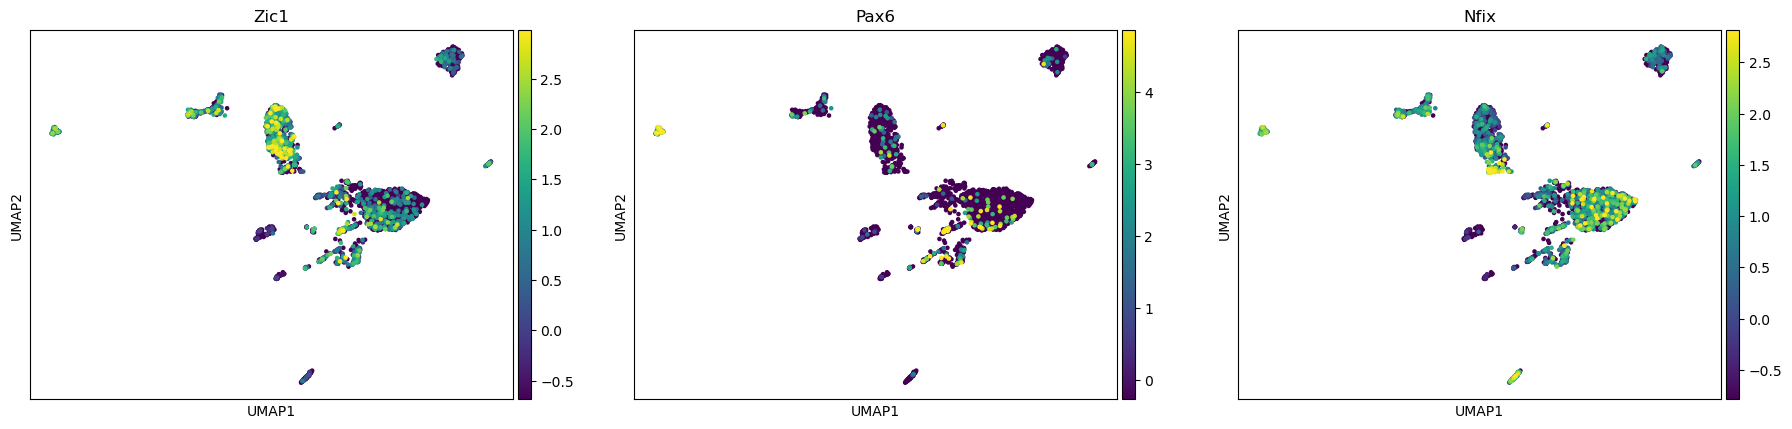

In [ ]:
# Type I SGN marker
sc.pl.umap(introexon2, color=['Zic1','Pax6','Nfix'], legend_loc='on data', vmax='p99')

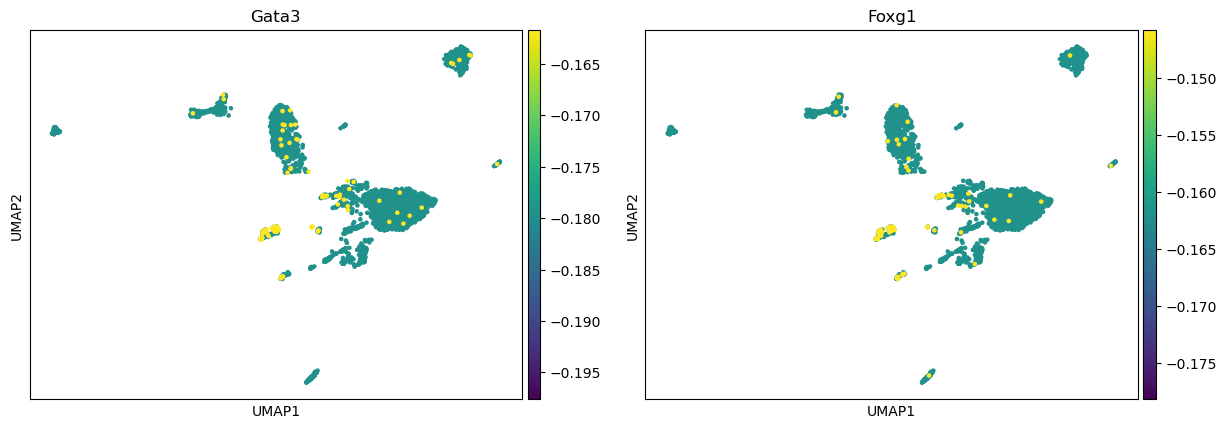

In [ ]:
# type ii SGNS
sc.pl.umap(introexon2, color=['Gata3','Foxg1'], legend_loc='on data',vmax='p95')

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


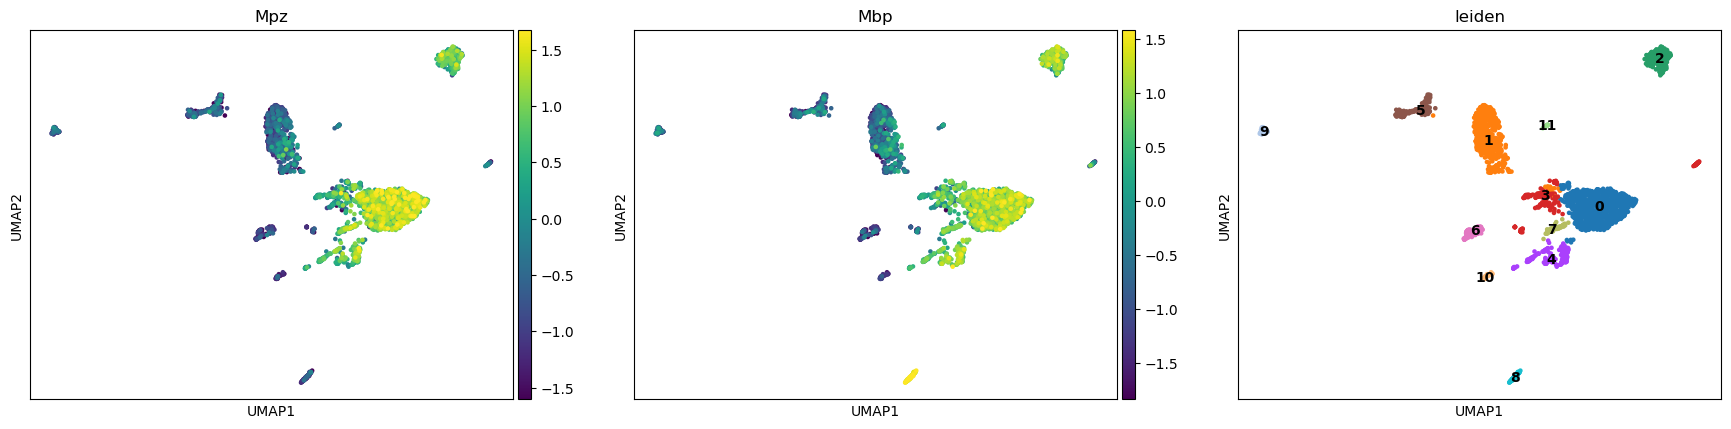

In [ ]:
sc.pl.umap(introexon2, color=['Mpz','Mbp','leiden'], legend_loc='on data',vmax='p99')

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldc

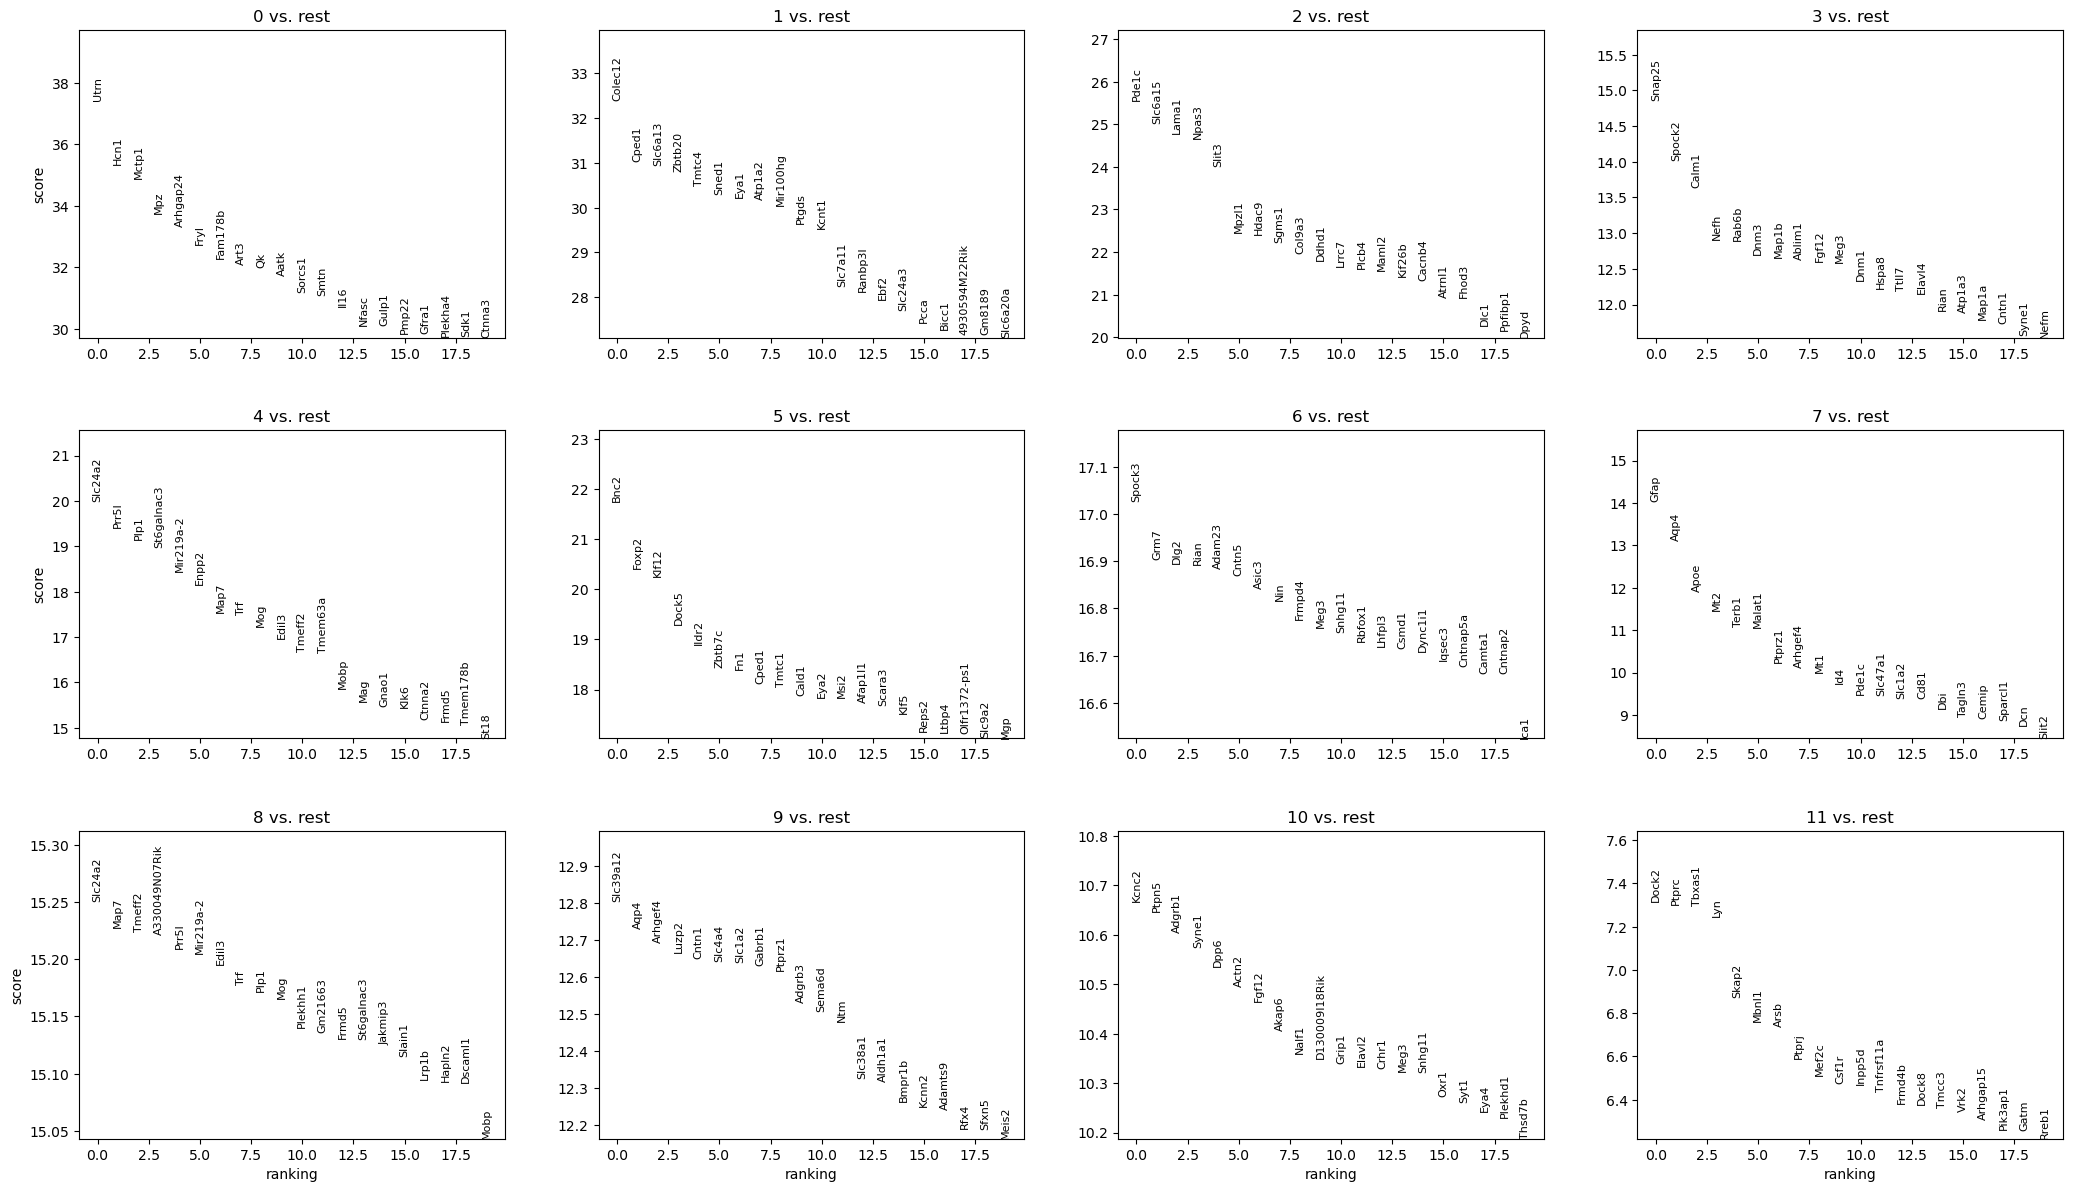

In [ ]:
sc.tl.rank_genes_groups(introexon2, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(introexon2, n_genes=20, sharey=False)

In [ ]:
introexon2

AnnData object with n_obs × n_vars = 2751 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'sample_ID_Plate_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

# remove glial cell

In [ ]:
introexon_no0_no2=introexon2[introexon2.obs.leiden!='4'].copy()
introexon_no0_no2=introexon_no0_no2[introexon_no0_no2.obs.leiden!='0'].copy()
introexon_no0_no2

AnnData object with n_obs × n_vars = 1646 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'sample_ID_Plate_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


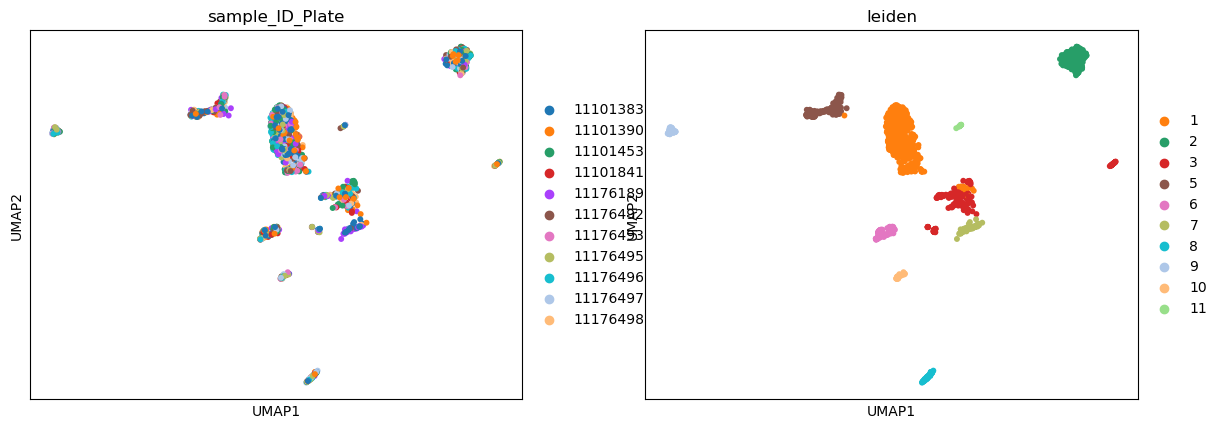

In [ ]:
sc.pl.umap(introexon_no0_no2,color=['sample_ID_Plate','leiden'])

In [ ]:
sc.pp.neighbors(introexon_no0_no2, n_neighbors=25, n_pcs=15)
sc.tl.leiden(introexon_no0_no2, resolution=0.3)
sc.tl.umap(introexon_no0_no2,min_dist=0.2)

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


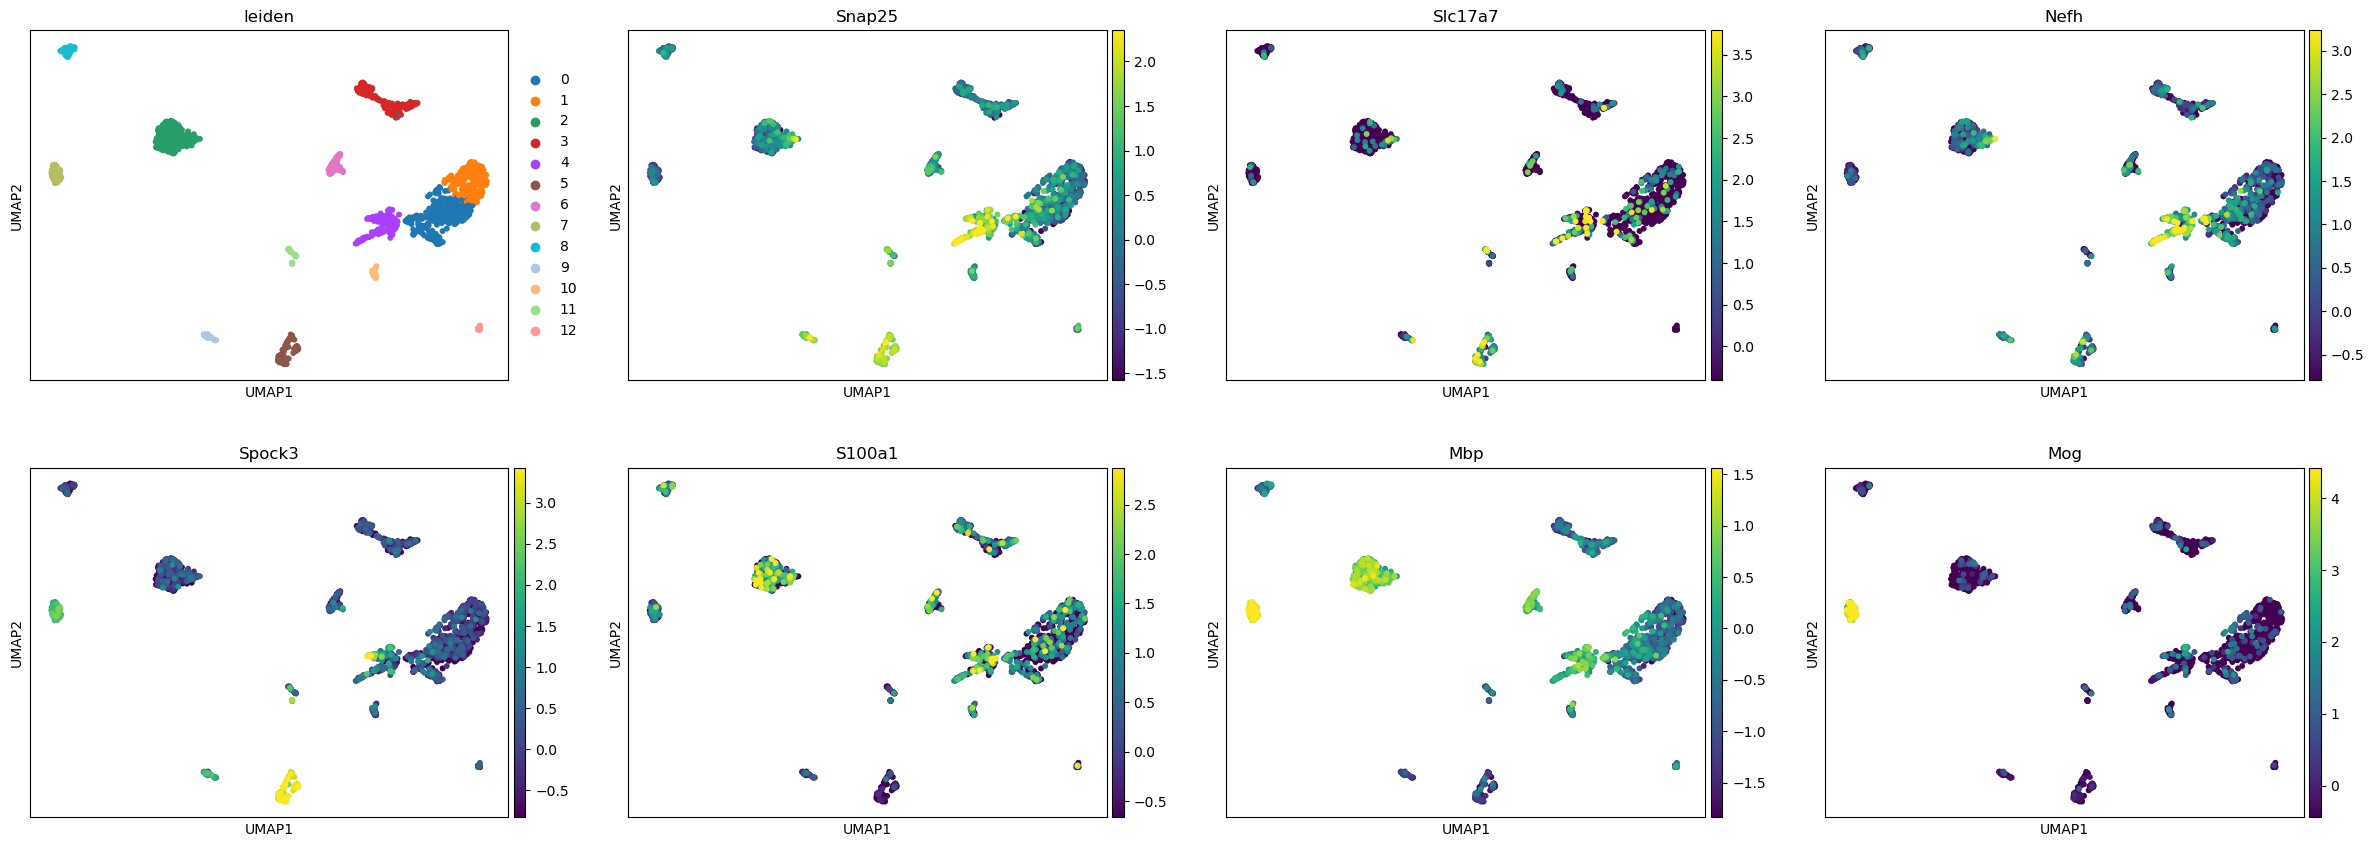

In [ ]:
sc.pl.umap(introexon_no0_no2,color=['leiden','Snap25','Slc17a7','Nefh','Spock3','S100a1','Mbp','Mog'],vmax='p99')

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldc

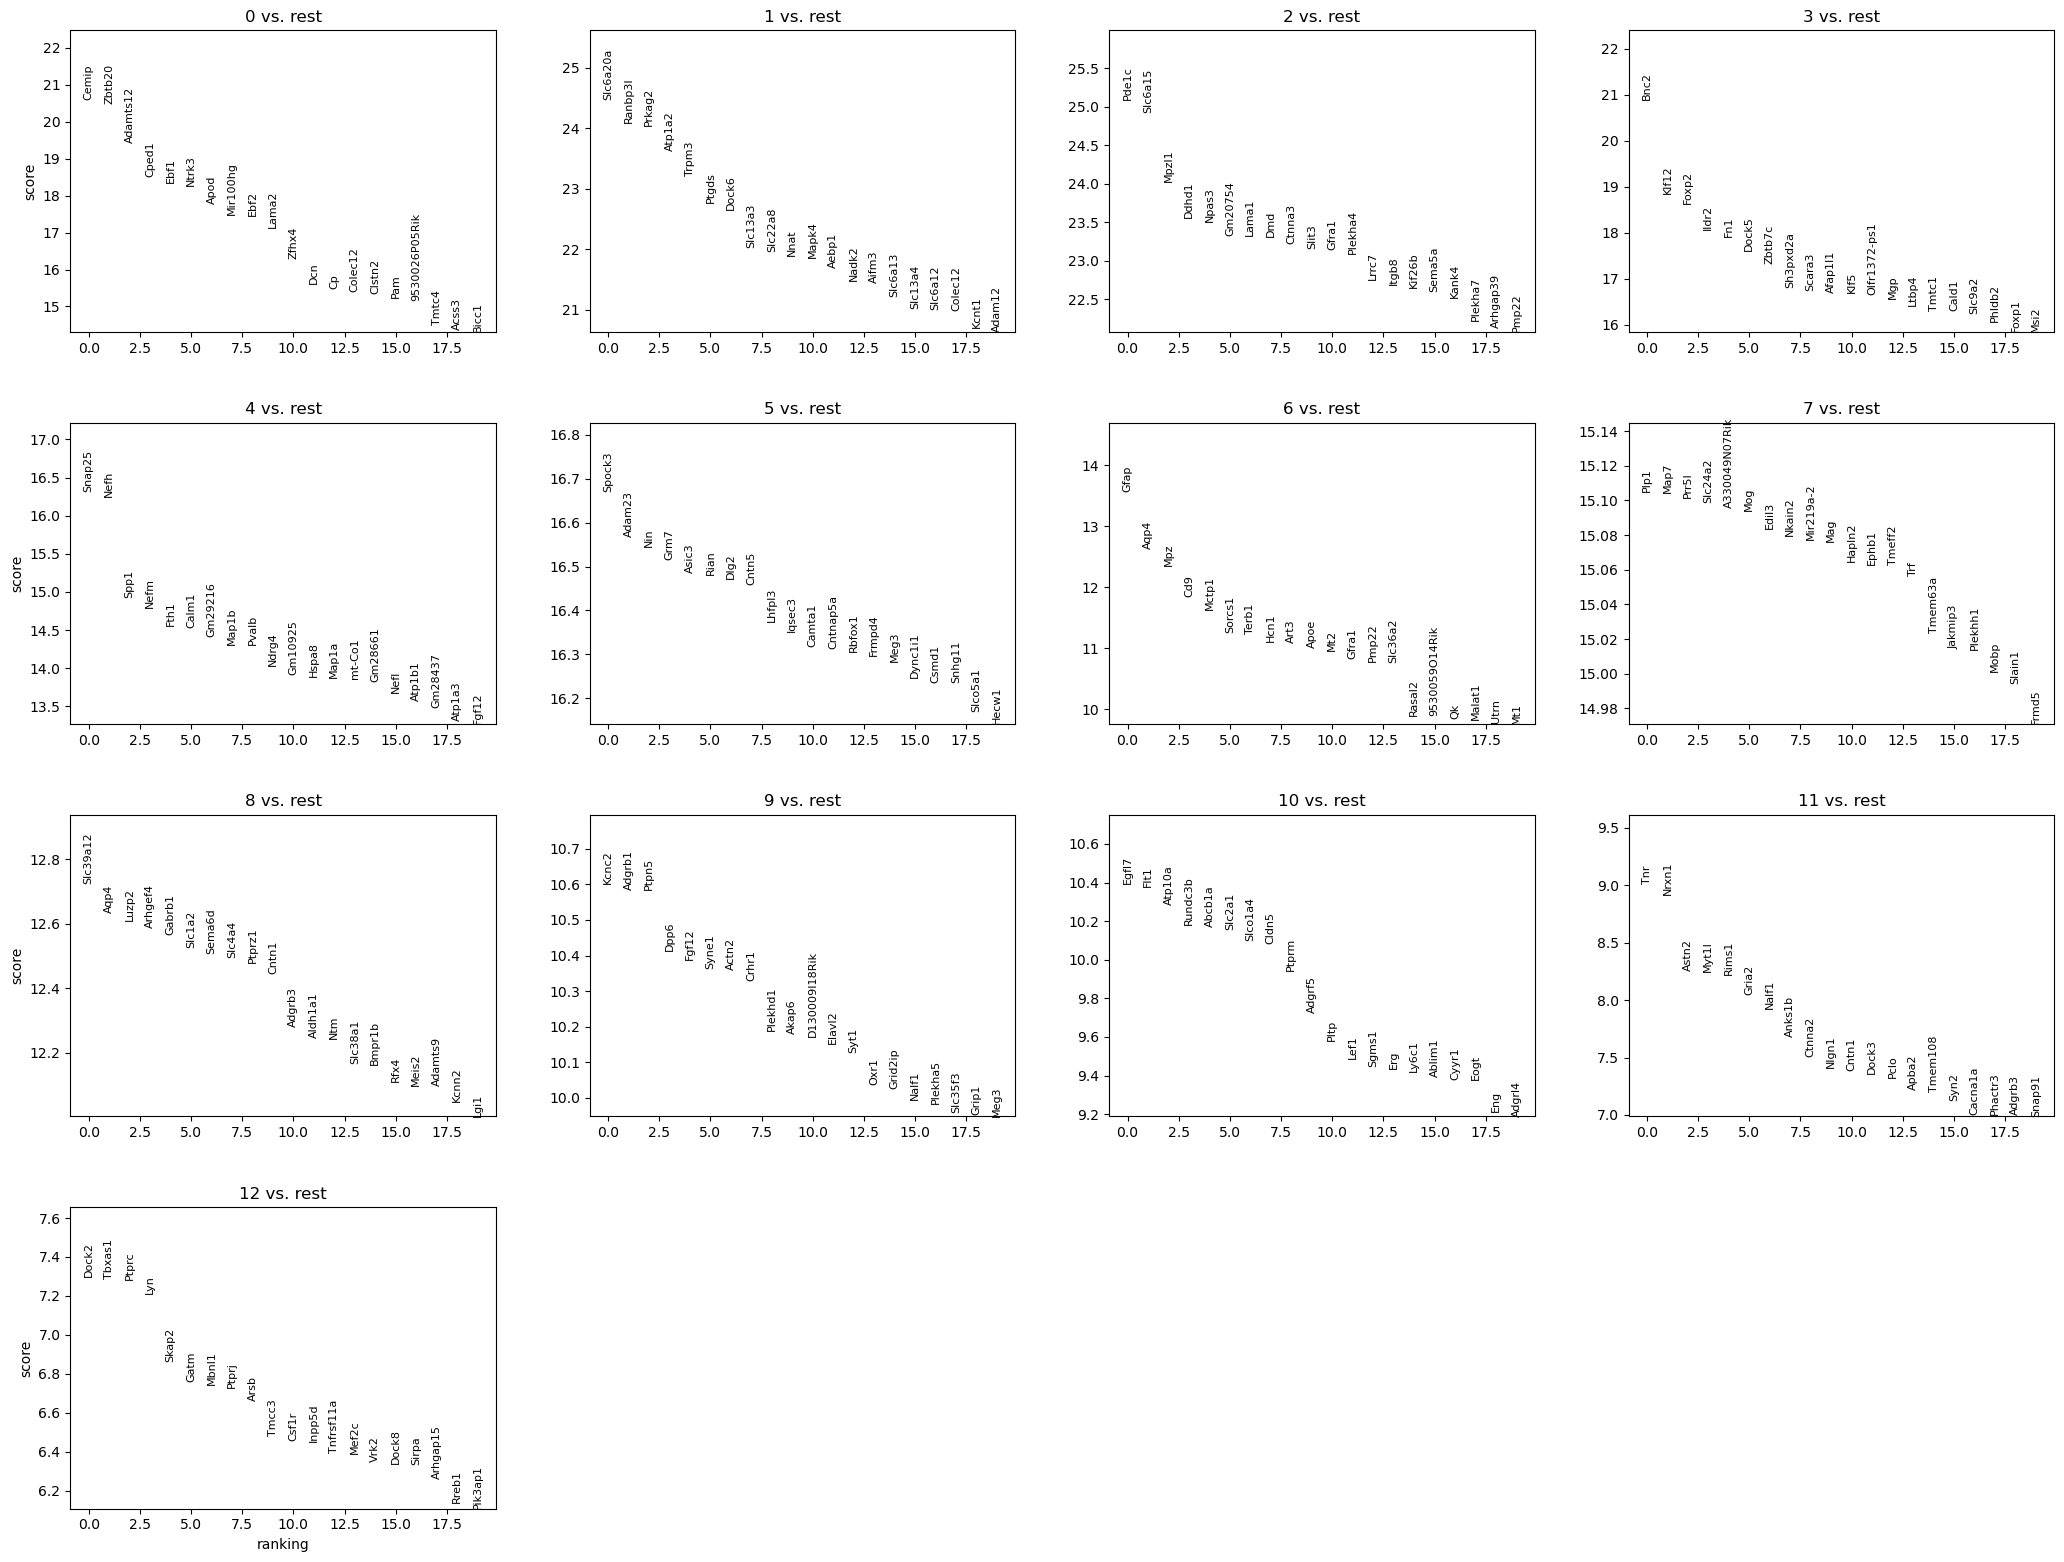

In [ ]:
sc.tl.rank_genes_groups(introexon_no0_no2, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(introexon_no0_no2, n_genes=20, sharey=False)

In [ ]:
introexon_no0_no2

AnnData object with n_obs × n_vars = 1646 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'sample_ID_Plate_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

In [ ]:
marker_genes_dict = introexon_no0_no2.uns['rank_genes_groups']['names']
marker_genes_df = pd.DataFrame(marker_genes_dict)
marker_genes_df

0         1        2         3         4         5        6  \
0         Cemip  Slc6a20a    Pde1c      Bnc2    Snap25    Spock3     Gfap   
1        Zbtb20   Ranbp3l  Slc6a15     Klf12      Nefh    Adam23     Aqp4   
2      Adamts12    Prkag2    Mpzl1     Foxp2      Spp1       Nin      Mpz   
3         Cped1    Atp1a2    Ddhd1     Ildr2      Nefm      Grm7      Cd9   
4          Ebf1     Trpm3    Npas3       Fn1      Fth1     Asic3    Mctp1   
...         ...       ...      ...       ...       ...       ...      ...   
32758      Dtna     Hdac9     Eya1    Cacnb4      Pbx1  Mir100hg     Ano4   
32759    Sorbs1       Fyn     Ank2  Slc22a23   Gm37376     Lama2  Phactr1   
32760    Ctnnd2     Fnbp1     Nebl      Mitf    Zbtb20      Tcf4   Ube2e2   
32761    Cacnb4     Stk39    Ntrk3     Arnt2     Auts2     Trpm3   Cabin1   
32762     Magi2     Pde4d    Prkcb    Adgrl3  Mir99ahg     Ptgds    Rbms3   

                   7         8       9        10             11             12  
0               Plp1  Slc39a12   Kcnc2     Egfl7            Tnr          Dock2  
1               Map7      Aqp4  Adgrb1      Flt1          Nrxn1         Tbxas1  
2              Prr5l     Luzp2   Ptpn5    Atp10a          Astn2          Ptprc  
3            Slc24a2   Arhgef4    Dpp6   Rundc3b          Myt1l            Lyn  
4      A330049N07Rik    Gabrb1   Fgf12    Abcb1a          Rims1          Skap2  
...              ...       ...     ...       ...            ...            ...  
32758           Pbx1     Lamc1    Nfib      Dpyd          Gulp1          Pard3  
32759          Trpm3     Elmo1   Ptgds     Lama2           Dlc1          Nedd4  
32760  9530026P05Rik    Zfp536   Trpm3     Magi2  9530026P05Rik  9530026P05Rik  
32761           Utrn   Slc38a2    Ddx5      Ank2          Itih5         Sptbn1  
32762            Lpp     Stk39  Zbtb20  Mir99ahg          Lama2          Auts2  

[32763 rows x 13 columns]

In [ ]:
#Spock3 

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


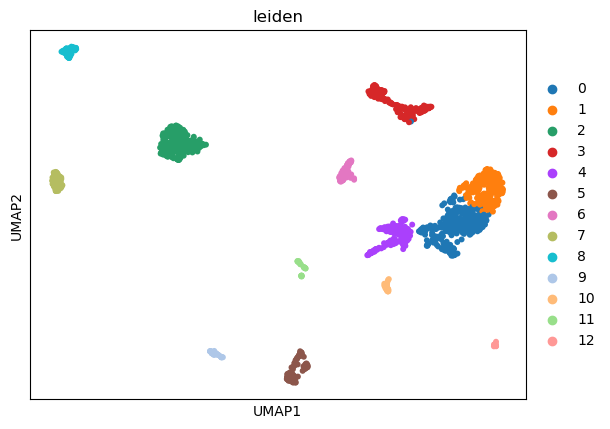

In [ ]:
sc.pl.umap(introexon_no0_no2, color=['leiden'])

### exclude it 

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


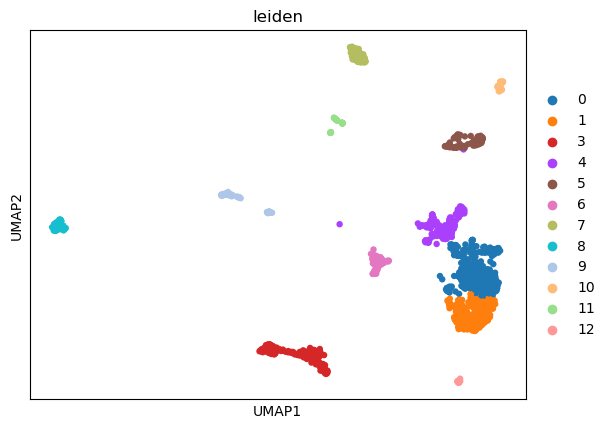

In [ ]:
introexonno2=introexon_no0_no2[introexon_no0_no2.obs.leiden!='2'].copy()
sc.pl.umap(introexonno2, color=['leiden'])

In [ ]:
sc.pp.neighbors(introexonno2, n_neighbors=25, n_pcs=15)
sc.tl.leiden(introexonno2, resolution=0.5)
sc.tl.umap(introexonno2,min_dist=0.3)

In [ ]:
introexonno2

AnnData object with n_obs × n_vars = 1404 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'sample_ID_Plate_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


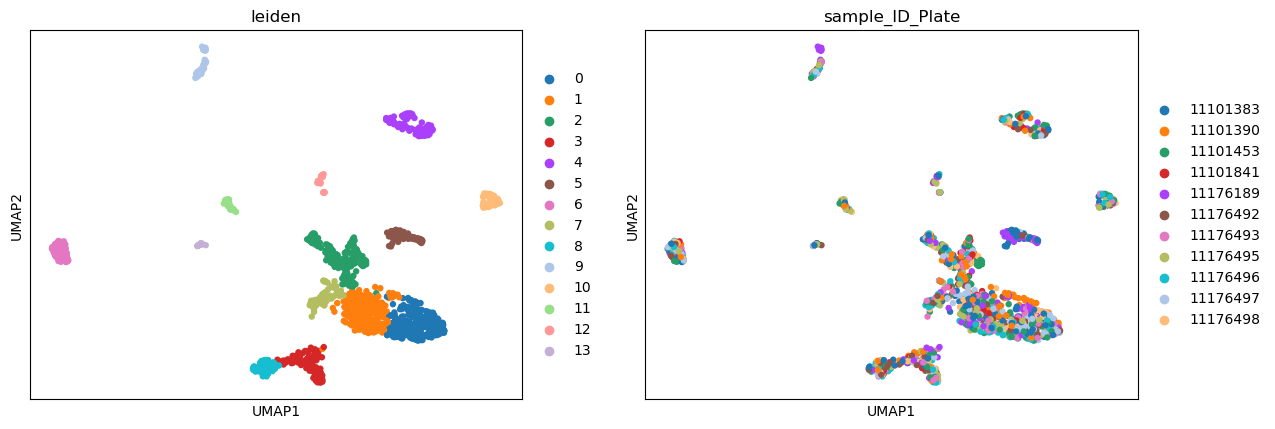

In [ ]:
sc.pl.umap(introexonno2,color=['leiden','sample_ID_Plate'])

In [ ]:
introexonno2

AnnData object with n_obs × n_vars = 1404 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'sample_ID_Plate_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

### try this 

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


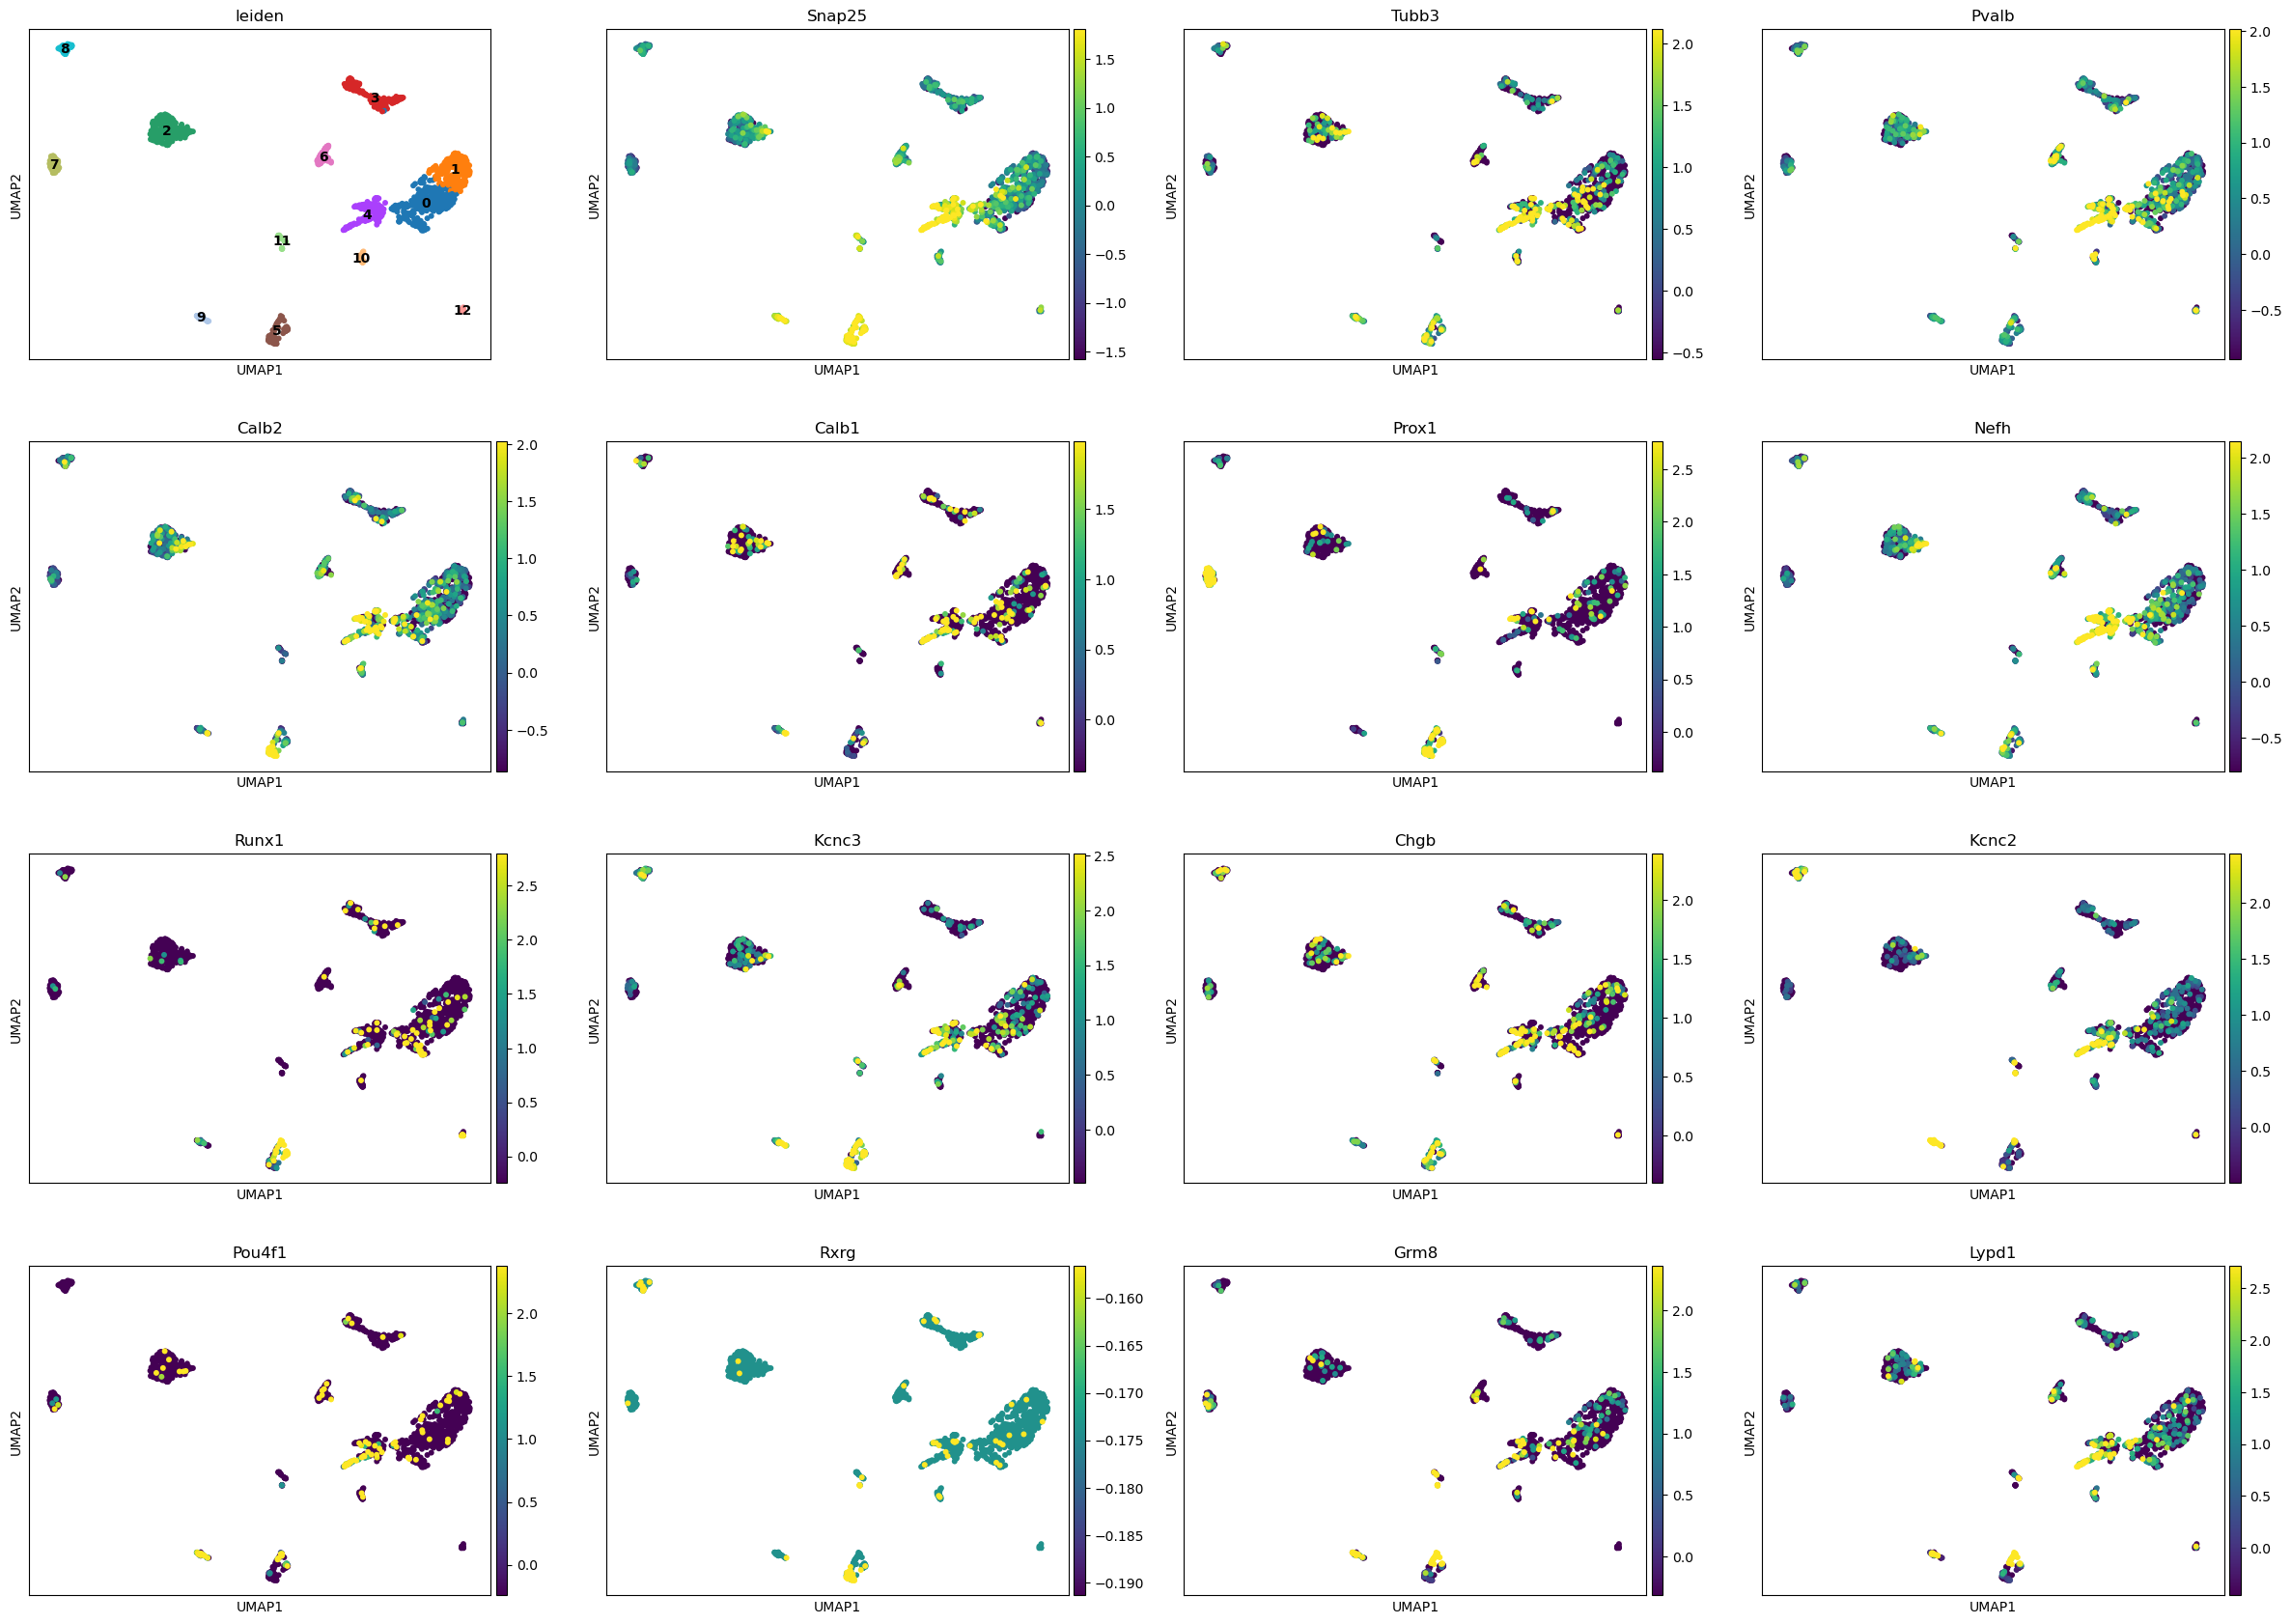

In [ ]:
sc.pl.umap(introexon_no0_no2, color=['leiden','Snap25','Tubb3','Pvalb','Calb2','Calb1','Prox1','Nefh','Runx1','Kcnc3','Chgb','Kcnc2','Pou4f1','Rxrg','Grm8','Lypd1'], legend_loc='on data',vmax='p95')

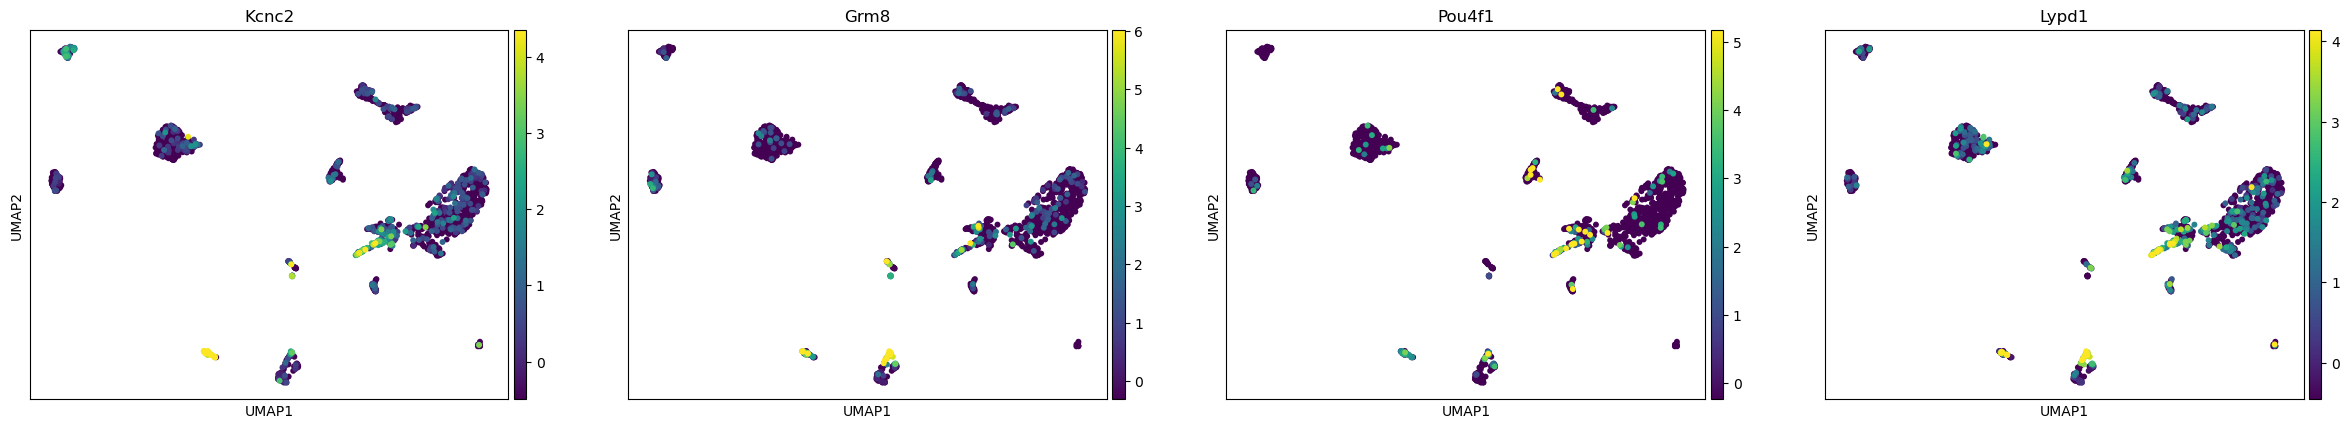

In [ ]:
sc.pl.umap(introexon_no0_no2, color=['Kcnc2','Grm8','Pou4f1','Lypd1'], legend_loc='on data',vmax='p99')

In [ ]:
# save this as h5ad
introexon_no0_no2.write_h5ad('/proj/sensoryaging/data/data/SGNs_process_data/introexonno2_remove_189.h5ad')

In [ ]:
del adata

### new edition 

In [145]:
# read h5ad
introexon_no0_no2=sc.read_h5ad('/proj/sensoryaging/data/data/SGNs_process_data/introexonno2_remove_189.h5ad')

In [146]:
introexon_no0_no2

AnnData object with n_obs × n_vars = 1646 × 32763
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

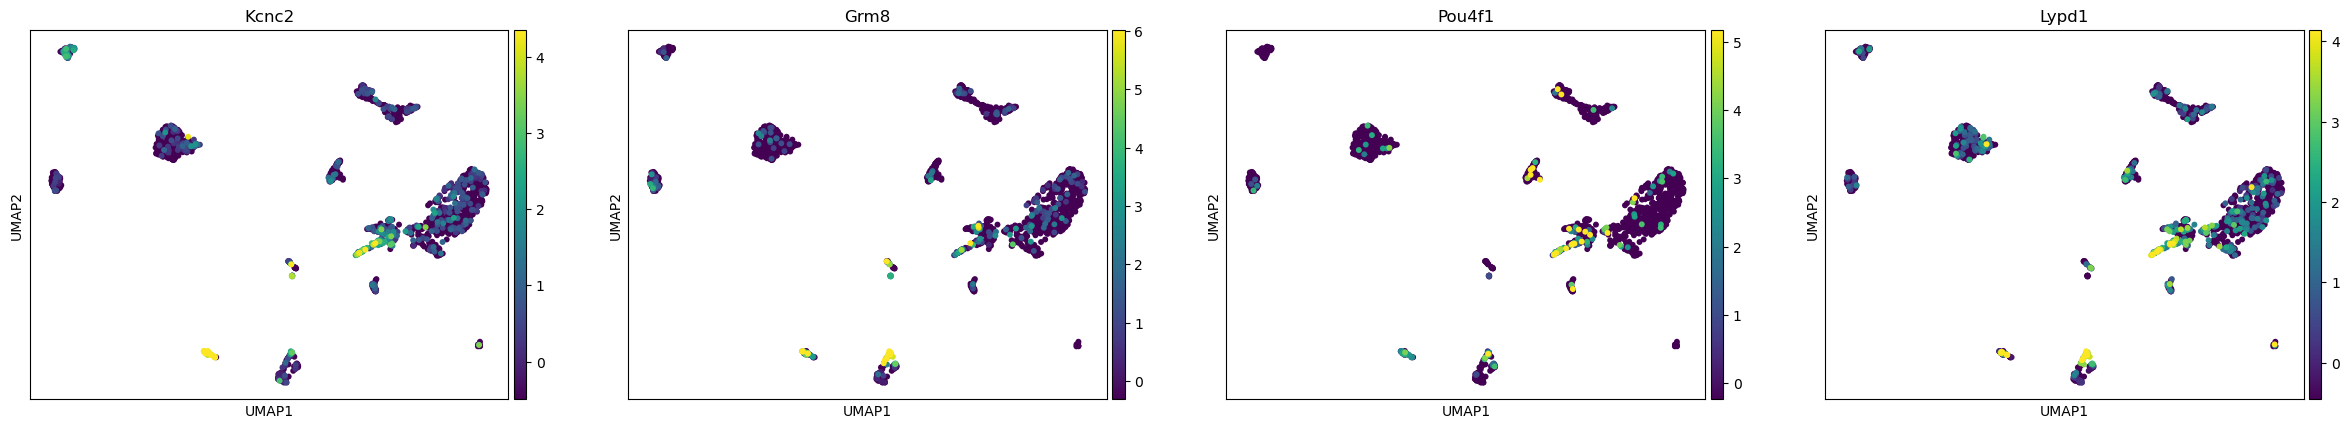

In [147]:
sc.pl.umap(introexon_no0_no2, color=['Kcnc2','Grm8','Pou4f1','Lypd1'], legend_loc='on data',vmax='p99')